In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scikitplot as skplt
import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [2]:
#importing datasets

cab_df = pd.read_csv("Cab_Data.csv")
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [3]:
cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There are no missing values in this dataset.

In [4]:
cab_df.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

The `Date of Travel` is of serial number format. Extracting data information from this column.

In [5]:
%%time

from datetime import datetime
import xlrd

cab_df['Travel_Date'] = cab_df['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))

Wall time: 1.52 s


In [6]:
cab_df.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip Travel_Date  
0         370.95       313.635  2016-01-08  
1         358.52       334.854  2016-01-06  
2         125.20        97.632  2016-01-02  
3         377.40       351.602  2016-01-07  
4         114.62        97.776  2016-01-03

In [7]:
#Dropping 'Date of Travel' column
cab_df.drop('Date of Travel', axis = 1, inplace = True)

In [8]:
cab_df.head()

Transaction ID   Company        City  KM Travelled  Price Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost of Trip Travel_Date  
0       313.635  2016-01-08  
1       334.854  2016-01-06  
2        97.632  2016-01-02  
3       351.602  2016-01-07  
4        97.776  2016-01-03

In [9]:
#Import city dataset
city_df = pd.read_csv('City.csv')
city_df

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [10]:
#checking if Cities in city_df are in cab_df

np.setdiff1d(city_df.City, cab_df.City)

array(['SAN FRANCISCO CA'], dtype=object)

Travel information regarding travelers from San Francisco are not present in the cab_df dataset. Therefore, when both cab_df and city_df will be inner-joined based on the city column, the row containing San Francisco city in city_df will be dropped.

In [11]:
df1 = pd.merge(cab_df, city_df, on = 'City')

In [12]:
# importing Transaction ID dataset

trans_df = pd.read_csv('Transaction_ID.csv')
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [13]:
trans_df.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [14]:
#Checking for Transaction ID's not in df1 dataset

len(np.setdiff1d(trans_df['Transaction ID'], df1['Transaction ID']))

80706

There are about 80,706 transaction ID's not present in the df1 dataset. These will be dropped when joining trans_df with the df1 dataset

In [15]:
df2 = pd.merge(df1, trans_df, on = 'Transaction ID')

In [16]:
# importing customer ID df

cust_df = pd.read_csv('Customer_ID.csv')
cust_df.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [17]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
# Checking for Customer ID's not in df2 dataset

len(np.setdiff1d(cust_df['Customer ID'], df2['Customer ID']))

3023

Around 3023 Customer ID's are not in the df2 dataset. These will be dropped when cust_df will be joined with the df2 dataset. 

In [19]:
full_df = pd.merge(df2, cust_df, on = 'Customer ID')
full_df.head()

Transaction ID     Company        City  KM Travelled  Price Charged  \
0        10000011    Pink Cab  ATLANTA GA         30.45         370.95   
1        10351127  Yellow Cab  ATLANTA GA         26.19         598.70   
2        10412921  Yellow Cab  ATLANTA GA         42.55         792.05   
3        10000012    Pink Cab  ATLANTA GA         28.62         358.52   
4        10320494  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost of Trip Travel_Date Population     Users  Customer ID Payment_Mode  \
0      313.6350  2016-01-08   814,885    24,701         29290         Card   
1      317.4228  2018-07-21   814,885    24,701         29290         Cash   
2      597.4020  2018-11-23   814,885    24,701         29290         Card   
3      334.8540  2016-01-06   814,885    24,701         27703         Card   
4      467.1192  2018-04-21   814,885    24,701         27703         Card   

  Gender  Age  Income (USD/Month)  
0   Male   28               10813  
1   Male   28               10813  
2   Male   28               10813  
3   Male   27                9237  
4   Male   27                9237

In [20]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Company             359392 non-null  object        
 2   City                359392 non-null  object        
 3   KM Travelled        359392 non-null  float64       
 4   Price Charged       359392 non-null  float64       
 5   Cost of Trip        359392 non-null  float64       
 6   Travel_Date         359392 non-null  datetime64[ns]
 7   Population          359392 non-null  object        
 8   Users               359392 non-null  object        
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [21]:
#Checking for NA's

full_df.isna().sum()

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Travel_Date           0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

We have joined all datasets and created a master dataset comprising of columns from all of the datasets.

Next, splitting the `City` column in to city and state columns. Fortunatly, there already exists a forum on the internet with a list of all US States abbreviations in a list format.https://snipplr.com/view/50728/list-of-us-state-abbreviations 

In [22]:
%%time
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(full_df)):
    if full_df.City[i].split()[~0] in US_States:
        city.append(full_df.City[i].split(f' {full_df.City[i].split()[~0]}')[0])
        state.append(full_df.City[i].split()[~0])
    else:
        city.append(full_df.City[i])
        state.append(np.nan)

Wall time: 13.1 s


In [23]:
full_df['City'] = city
full_df['State'] = state

full_df.head()

Transaction ID     Company     City  KM Travelled  Price Charged  \
0        10000011    Pink Cab  ATLANTA         30.45         370.95   
1        10351127  Yellow Cab  ATLANTA         26.19         598.70   
2        10412921  Yellow Cab  ATLANTA         42.55         792.05   
3        10000012    Pink Cab  ATLANTA         28.62         358.52   
4        10320494  Yellow Cab  ATLANTA         36.38         721.10   

   Cost of Trip Travel_Date Population     Users  Customer ID Payment_Mode  \
0      313.6350  2016-01-08   814,885    24,701         29290         Card   
1      317.4228  2018-07-21   814,885    24,701         29290         Cash   
2      597.4020  2018-11-23   814,885    24,701         29290         Card   
3      334.8540  2016-01-06   814,885    24,701         27703         Card   
4      467.1192  2018-04-21   814,885    24,701         27703         Card   

  Gender  Age  Income (USD/Month) State  
0   Male   28               10813    GA  
1   Male   28               10813    GA  
2   Male   28               10813    GA  
3   Male   27                9237    GA  
4   Male   27                9237    GA

In [24]:
print(full_df.City.unique())
print()
full_df.State.unique()

['ATLANTA' 'AUSTIN' 'BOSTON' 'CHICAGO' 'DALLAS' 'DENVER' 'LOS ANGELES'
 'MIAMI' 'NASHVILLE' 'NEW YORK' 'ORANGE COUNTY' 'PHOENIX' 'PITTSBURGH'
 'SACRAMENTO' 'SAN DIEGO' 'SEATTLE' 'SILICON VALLEY' 'TUCSON' 'WASHINGTON']



array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', nan, 'AZ',
       'PA', 'WA', 'DC'], dtype=object)

In [25]:
full_df.isna().sum()

Transaction ID            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Travel_Date               0
Population                0
Users                     0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
State                 12501
dtype: int64

There are about 12501 observations with missing states columns. Checking which cities have missing states. 

In [26]:
full_df[full_df.State.isna()]['City'].unique()

array(['ORANGE COUNTY', 'SILICON VALLEY'], dtype=object)

Since both Orange County and Silicon Valley are located within the State of California, I will impute the missing values in the `State`column belonging to these cities as 'CA' (California)

In [27]:
full_df.fillna('CA', inplace = True)

In [28]:
full_df.isna().sum()

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Travel_Date           0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
State                 0
dtype: int64

In [29]:
#Checking for duplicated observation or columns
full_df.duplicated().sum() #None

0

In [30]:
#Replacing spaces in columns names with _

full_df.columns = [col.strip().replace(' ', '_').lower() for col in full_df.columns]
print(full_df.columns)
full_df.rename(columns = {'income_(usd/month)' : 'cust_income'}, inplace = True)

Index(['transaction_id', 'company', 'city', 'km_travelled', 'price_charged',
       'cost_of_trip', 'travel_date', 'population', 'users', 'customer_id',
       'payment_mode', 'gender', 'age', 'income_(usd/month)', 'state'],
      dtype='object')


In [31]:
#Sorting the data based on date of travel and transaction ID.

full_df.sort_values(['travel_date', 'transaction_id'], ignore_index=True, inplace = True)

In [32]:
full_df

transaction_id     company        city  km_travelled  price_charged  \
0             10000013    Pink Cab     ATLANTA          9.04         125.20   
1             10000029    Pink Cab      BOSTON         21.34         324.21   
2             10000030    Pink Cab      BOSTON         41.30         646.06   
3             10000041    Pink Cab     CHICAGO         35.02         598.43   
4             10000045    Pink Cab     CHICAGO          3.24          48.04   
...                ...         ...         ...           ...            ...   
359387        10439960  Yellow Cab  WASHINGTON         33.93         474.47   
359388        10439984  Yellow Cab  WASHINGTON         40.00         641.78   
359389        10440028  Yellow Cab  WASHINGTON         26.22         405.25   
359390        10440034  Yellow Cab  WASHINGTON         34.68         505.38   
359391        10440093  Yellow Cab  WASHINGTON          4.32          60.41   

        cost_of_trip travel_date   population      users  customer_id  \
0            97.6320  2016-01-02     814,885     24,701         28712   
1           226.2040  2016-01-02     248,968     80,021         58925   
2           454.3000  2016-01-02     248,968     80,021         58551   
3           406.2320  2016-01-02   1,955,130    164,468          4289   
4            33.6960  2016-01-02   1,955,130    164,468          5734   
...              ...         ...          ...        ...          ...   
359387      411.2316  2018-12-31     418,859    127,001         52449   
359388      484.8000  2018-12-31     418,859    127,001         51614   
359389      327.2256  2018-12-31     418,859    127,001         52389   
359390      470.2608  2018-12-31     418,859    127,001         51877   
359391       55.4688  2018-12-31     418,859    127,001         53810   

       payment_mode  gender  age  cust_income state  
0              Cash    Male   53        11242    GA  
1              Card    Male   38        26550    MA  
2              Card    Male   25        21734    MA  
3              Card    Male   19        28719    IL  
4              Card    Male   23        22475    IL  
...             ...     ...  ...          ...   ...  
359387         Card  Female   40        23569    DC  
359388         Card  Female   55        12279    DC  
359389         Card  Female   29         5568    DC  
359390         Cash    Male   46        16993    DC  
359391         Cash    Male   23        21455    DC  

[359392 rows x 15 columns]

In [33]:
#checking for any duplicated observations

print(cust_df.duplicated().sum())
print(trans_df.duplicated().sum())
print(cab_df.duplicated().sum())

#None

0
0
0


##### Now the dataset is complete and ready for EDA

In [34]:
# full_df.to_csv('full_df.csv', index = False)

# EDA

In [35]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction_id  359392 non-null  int64         
 1   company         359392 non-null  object        
 2   city            359392 non-null  object        
 3   km_travelled    359392 non-null  float64       
 4   price_charged   359392 non-null  float64       
 5   cost_of_trip    359392 non-null  float64       
 6   travel_date     359392 non-null  datetime64[ns]
 7   population      359392 non-null  object        
 8   users           359392 non-null  object        
 9   customer_id     359392 non-null  int64         
 10  payment_mode    359392 non-null  object        
 11  gender          359392 non-null  object        
 12  age             359392 non-null  int64         
 13  cust_income     359392 non-null  int64         
 14  state           359392 non-null  obj

Both `population` and `users` columns are of object data type. Converting these columns to numeric

In [36]:
full_df.population[0], full_df.users[0]
#There are commas inside figures in population and users.

(' 814,885 ', ' 24,701 ')

In [37]:
full_df.population = [full_df.population[i].replace(",", "") for i in range(len(full_df))]
full_df.users = [full_df.users[i].replace(",", "") for i in range(len(full_df))]

In [38]:
full_df

transaction_id     company        city  km_travelled  price_charged  \
0             10000013    Pink Cab     ATLANTA          9.04         125.20   
1             10000029    Pink Cab      BOSTON         21.34         324.21   
2             10000030    Pink Cab      BOSTON         41.30         646.06   
3             10000041    Pink Cab     CHICAGO         35.02         598.43   
4             10000045    Pink Cab     CHICAGO          3.24          48.04   
...                ...         ...         ...           ...            ...   
359387        10439960  Yellow Cab  WASHINGTON         33.93         474.47   
359388        10439984  Yellow Cab  WASHINGTON         40.00         641.78   
359389        10440028  Yellow Cab  WASHINGTON         26.22         405.25   
359390        10440034  Yellow Cab  WASHINGTON         34.68         505.38   
359391        10440093  Yellow Cab  WASHINGTON          4.32          60.41   

        cost_of_trip travel_date population     users  customer_id  \
0            97.6320  2016-01-02    814885     24701         28712   
1           226.2040  2016-01-02    248968     80021         58925   
2           454.3000  2016-01-02    248968     80021         58551   
3           406.2320  2016-01-02   1955130    164468          4289   
4            33.6960  2016-01-02   1955130    164468          5734   
...              ...         ...        ...       ...          ...   
359387      411.2316  2018-12-31    418859    127001         52449   
359388      484.8000  2018-12-31    418859    127001         51614   
359389      327.2256  2018-12-31    418859    127001         52389   
359390      470.2608  2018-12-31    418859    127001         51877   
359391       55.4688  2018-12-31    418859    127001         53810   

       payment_mode  gender  age  cust_income state  
0              Cash    Male   53        11242    GA  
1              Card    Male   38        26550    MA  
2              Card    Male   25        21734    MA  
3              Card    Male   19        28719    IL  
4              Card    Male   23        22475    IL  
...             ...     ...  ...          ...   ...  
359387         Card  Female   40        23569    DC  
359388         Card  Female   55        12279    DC  
359389         Card  Female   29         5568    DC  
359390         Cash    Male   46        16993    DC  
359391         Cash    Male   23        21455    DC  

[359392 rows x 15 columns]

In [39]:
full_df.population[0]

' 814885 '

In [40]:
full_df.population = full_df.population.astype('int64')
full_df.users = full_df.users.astype('int64')

In [41]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction_id  359392 non-null  int64         
 1   company         359392 non-null  object        
 2   city            359392 non-null  object        
 3   km_travelled    359392 non-null  float64       
 4   price_charged   359392 non-null  float64       
 5   cost_of_trip    359392 non-null  float64       
 6   travel_date     359392 non-null  datetime64[ns]
 7   population      359392 non-null  int64         
 8   users           359392 non-null  int64         
 9   customer_id     359392 non-null  int64         
 10  payment_mode    359392 non-null  object        
 11  gender          359392 non-null  object        
 12  age             359392 non-null  int64         
 13  cust_income     359392 non-null  int64         
 14  state           359392 non-null  obj

### Visualizing Demographics

I will visualize the total population of both users and non-users of cab servies by state.

In [42]:
full_df.groupby(['state', 'city']).mean()[['population', 'users']]

population     users
state city                                
AZ    PHOENIX           943999.0    6133.0
      TUCSON            631442.0    5712.0
CA    LOS ANGELES      1595037.0  144132.0
      ORANGE COUNTY    1030185.0   12994.0
      SACRAMENTO        545776.0    7044.0
      SAN DIEGO         959307.0   69995.0
      SILICON VALLEY   1177609.0   27247.0
CO    DENVER            754233.0   12421.0
DC    WASHINGTON        418859.0  127001.0
FL    MIAMI            1339155.0   17675.0
GA    ATLANTA           814885.0   24701.0
IL    CHICAGO          1955130.0  164468.0
MA    BOSTON            248968.0   80021.0
NY    NEW YORK         8405837.0  302149.0
PA    PITTSBURGH        542085.0    3643.0
TN    NASHVILLE         327225.0    9270.0
TX    AUSTIN            698371.0   14978.0
      DALLAS            942908.0   22157.0
WA    SEATTLE           671238.0   25063.0

In [43]:
demograph = full_df.groupby(['state', 'city']).mean()[['population', 'users']].sum(level = 0)

In [44]:
demograph['non-users'] = demograph['population'] - demograph['users']

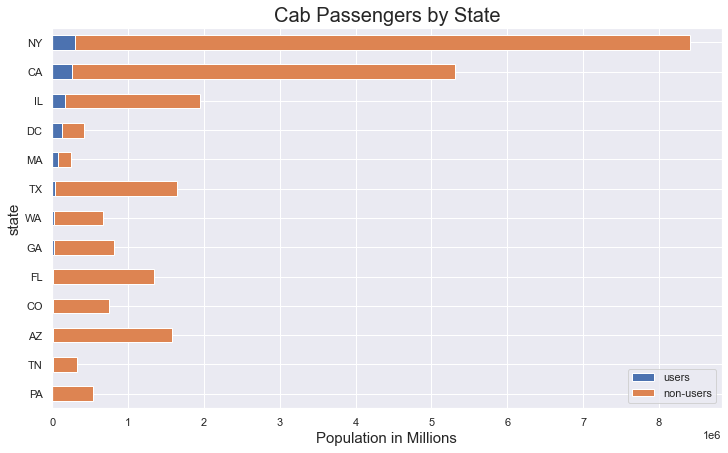

In [45]:
demograph.sort_values(['users', 'population'])[['users', 'non-users']].plot(kind = 'barh', 
                                                                 stacked = True, 
                                                                 figsize = (12, 7), 
                                                                 title = "Cab Passengers by State");

plt.xlabel("Population in Millions");

The state of New York has the highest population of approximatly 8.5 million followed California (around 5.3 million). Both of these states also have the highest number of users, followed by Illanois, DC and Massachusetts.  

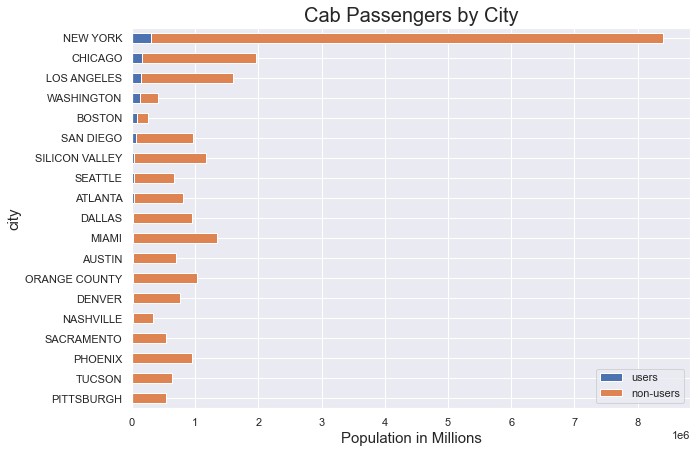

In [46]:
#Visualizing at City level

city_demog = full_df.groupby(['city']).mean()[['population', 'users']].sum(level = 0)

city_demog['non-users'] = city_demog['population'] - city_demog['users']

city_demog.sort_values(['users', 'population'])[['users', 'non-users']].\
                plot(kind = 'barh', stacked = True, figsize = (10, 7), title = "Cab Passengers by City");

plt.xlabel("Population in Millions");

New york city has the highest number of users followed by Chicago, Los Angeles and Washington.

In [47]:
#Dropping population and user columns
full_df.drop(['population', 'users'], axis = 1, inplace = True)

Proportion of Total Male Customers: 57.29 %
Proportion of Total Female Customers: 42.71 %


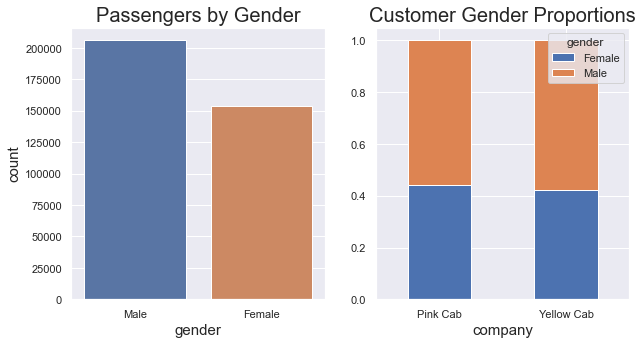

In [48]:
#Gender
print(f'Proportion of Total Male Customers: {full_df.gender.value_counts(normalize = True)[0]*100:.2f} %')
print(f'Proportion of Total Female Customers: {full_df.gender.value_counts(normalize = True)[1]*100:.2f} %')

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(full_df.gender, ax = ax[0]).set_title("Passengers by Gender");

pd.crosstab(index = full_df.company, columns = full_df.gender, normalize = 'index').\
plot(kind = 'bar', stacked = True, ax = ax[1], rot = 0, title = "Customer Gender Proportions");

Proportion of Male passengers are higher than female passengers. But both companuies have the same distribution of passengers by gender.

# Visualizing Trips

In [49]:
#Extracting dateime info from travel_date

full_df['year'] = full_df.travel_date.dt.year
full_df['month'] = full_df.travel_date.dt.month
full_df['date'] = full_df.travel_date.dt.day
full_df['day_of_week'] = full_df.travel_date.dt.dayofweek

In [50]:
full_df

transaction_id     company        city  km_travelled  price_charged  \
0             10000013    Pink Cab     ATLANTA          9.04         125.20   
1             10000029    Pink Cab      BOSTON         21.34         324.21   
2             10000030    Pink Cab      BOSTON         41.30         646.06   
3             10000041    Pink Cab     CHICAGO         35.02         598.43   
4             10000045    Pink Cab     CHICAGO          3.24          48.04   
...                ...         ...         ...           ...            ...   
359387        10439960  Yellow Cab  WASHINGTON         33.93         474.47   
359388        10439984  Yellow Cab  WASHINGTON         40.00         641.78   
359389        10440028  Yellow Cab  WASHINGTON         26.22         405.25   
359390        10440034  Yellow Cab  WASHINGTON         34.68         505.38   
359391        10440093  Yellow Cab  WASHINGTON          4.32          60.41   

        cost_of_trip travel_date  customer_id payment_mode  gender  age  \
0            97.6320  2016-01-02        28712         Cash    Male   53   
1           226.2040  2016-01-02        58925         Card    Male   38   
2           454.3000  2016-01-02        58551         Card    Male   25   
3           406.2320  2016-01-02         4289         Card    Male   19   
4            33.6960  2016-01-02         5734         Card    Male   23   
...              ...         ...          ...          ...     ...  ...   
359387      411.2316  2018-12-31        52449         Card  Female   40   
359388      484.8000  2018-12-31        51614         Card  Female   55   
359389      327.2256  2018-12-31        52389         Card  Female   29   
359390      470.2608  2018-12-31        51877         Cash    Male   46   
359391       55.4688  2018-12-31        53810         Cash    Male   23   

        cust_income state  year  month  date  day_of_week  
0             11242    GA  2016      1     2            5  
1             26550    MA  2016      1     2            5  
2             21734    MA  2016      1     2            5  
3             28719    IL  2016      1     2            5  
4             22475    IL  2016      1     2            5  
...             ...   ...   ...    ...   ...          ...  
359387        23569    DC  2018     12    31            0  
359388        12279    DC  2018     12    31            0  
359389         5568    DC  2018     12    31            0  
359390        16993    DC  2018     12    31            0  
359391        21455    DC  2018     12    31            0  

[359392 rows x 17 columns]

In [51]:
trip = full_df.groupby(['travel_date', 'company']).size().reset_index().rename(columns = {0 : 'count'})

#full_df.travel_date = full_df.travel_date.dt.date
trip

travel_date     company  count
0     2016-01-02    Pink Cab     41
1     2016-01-02  Yellow Cab    140
2     2016-01-03    Pink Cab     52
3     2016-01-03  Yellow Cab    126
4     2016-01-04    Pink Cab      4
...          ...         ...    ...
2185  2018-12-29  Yellow Cab    630
2186  2018-12-30    Pink Cab     56
2187  2018-12-30  Yellow Cab    201
2188  2018-12-31    Pink Cab     58
2189  2018-12-31  Yellow Cab    198

[2190 rows x 3 columns]

In [52]:
trip["day"] = trip.travel_date.dt.day_name()
trip

travel_date     company  count       day
0     2016-01-02    Pink Cab     41  Saturday
1     2016-01-02  Yellow Cab    140  Saturday
2     2016-01-03    Pink Cab     52    Sunday
3     2016-01-03  Yellow Cab    126    Sunday
4     2016-01-04    Pink Cab      4    Monday
...          ...         ...    ...       ...
2185  2018-12-29  Yellow Cab    630  Saturday
2186  2018-12-30    Pink Cab     56    Sunday
2187  2018-12-30  Yellow Cab    201    Sunday
2188  2018-12-31    Pink Cab     58    Monday
2189  2018-12-31  Yellow Cab    198    Monday

[2190 rows x 4 columns]

##### Distribution of number of trips

In [53]:
#Assigning Colors for companies
palette = ['#d965a4', '#ffc400']

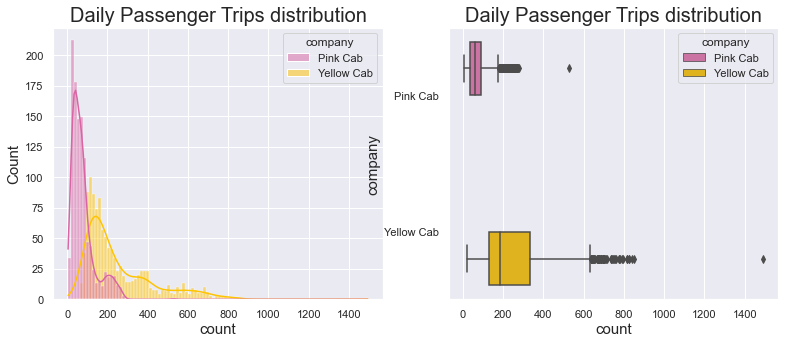

In [54]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
sns.histplot(x = 'count', hue = 'company', data = trip, kde = True, palette = palette, 
             bins = 100, ax = ax[0]).set_title("Daily Passenger Trips distribution");

sns.boxplot(x = 'count', y = 'company', data = trip, hue = 'company', palette = palette, 
            ax = ax[1]).set_title("Daily Passenger Trips distribution");

The above plots depicts the distribution of daily trips by both Cab companies. $\color{yellow}{\text{Yellow Cab}}$ has a higher median trips compared to $\color{violet}{\text{Pink Cab}}$. Both distributions are skewed to the right, signifying that greater number of trips on some days are rarer. 

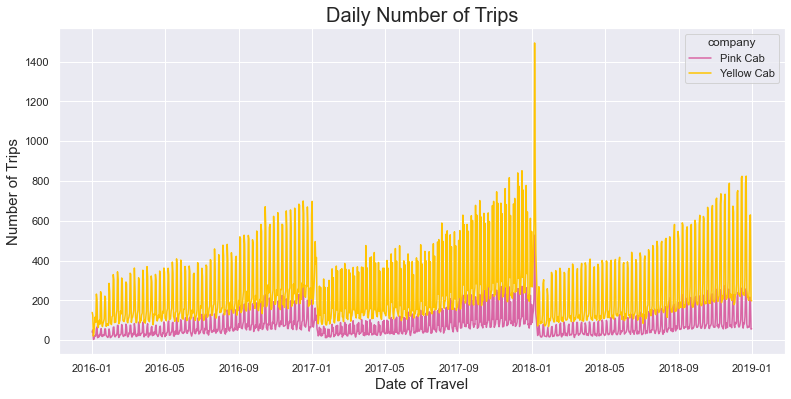

In [55]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);
plt.title('Daily Number of Trips');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');

The above plots displays daily trips made by both Cab companies from beginning of 2016 till the end of  2018. There is a clear seasonality on a weekly, monthly and yearly level for both Cab companies. Both Cab companies follows the same patterns. <br>
<br>
On a monthly level, there is a clear upward trend. On new year, the daily trips dips down to the lowest again. But on a yearly level, the trend seems to be almost uniform.<br>
<br>
$\color{yellow}{\text{Yellow Cab}}$ makes significantly more trips on any given day compared to $\color{violet}{\text{Pink Cab}}$. The highest reported trips for both Cab companies was on 5th of Januray, 2018.

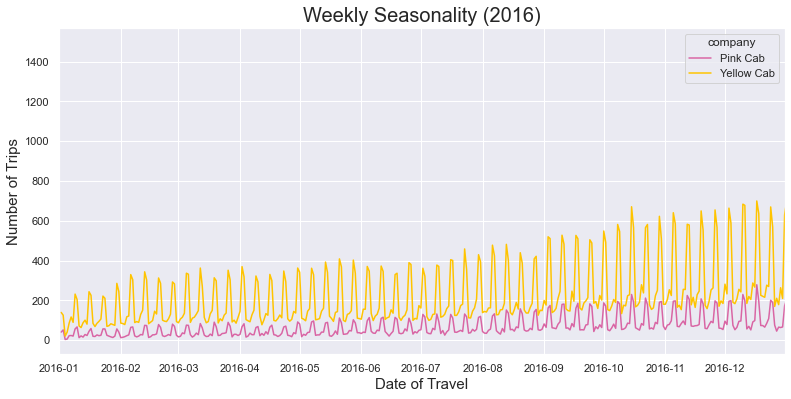

In [56]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.title('Weekly Seasonality (2016)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2016-01-01", "2016-12-31");

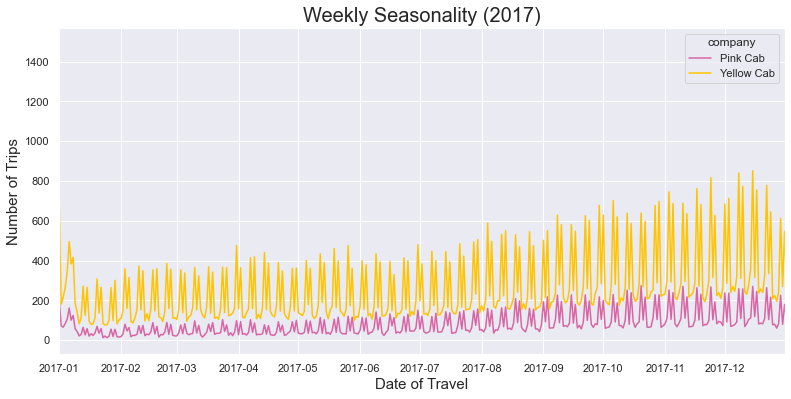

In [57]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.title('Weekly Seasonality (2017)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2017-01-01", "2017-12-31");

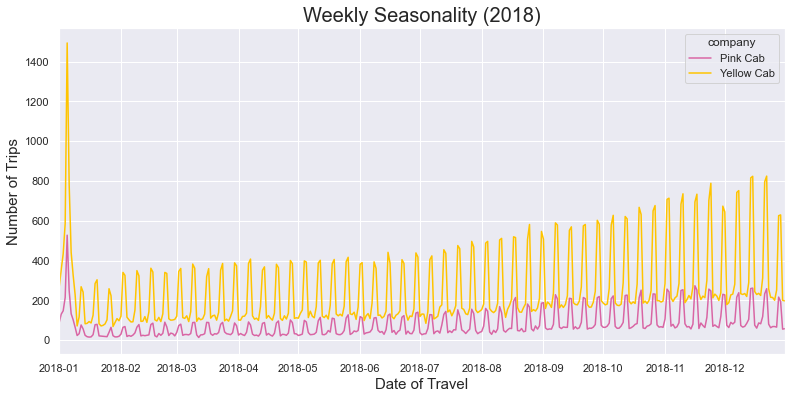

In [58]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.title('Weekly Seasonality (2018)');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2018-01-01", "2018-12-31");

For the year 2017, the seasonality pattern is different compared to both 2016 and 2018.

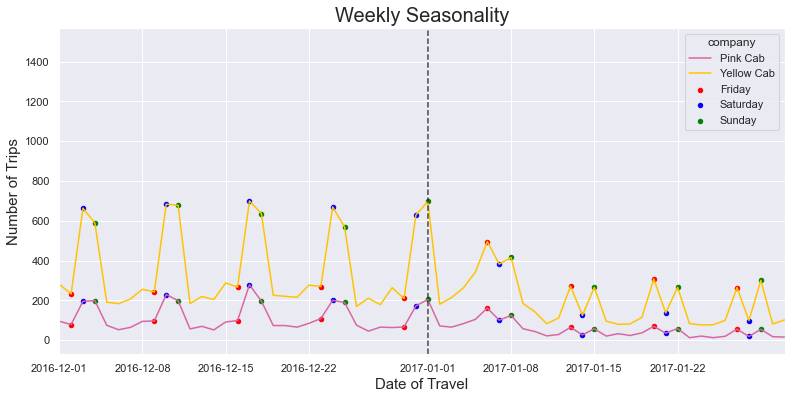

In [59]:
#Selecting range of months
#2016 to 2017

plt.figure(figsize = (13,6))

ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.axvline(x = '2017-01-01', color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green']):
    trip.query(f"day == '{day}'")[['travel_date', 'count']].\
    plot.scatter(x = 'travel_date', y = 'count', ax = ax, label = f'{day}', color = color);


plt.title('Weekly Seasonality');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2016-12-01", "2017-01-31");

On any given month, there is a weekly seasonality where the number of trips are especially high during the weekends (Saturday and Sunday) for the year 2016.<br>
<br>
Interestingly, for the year 2017, the seasonality starts to change. There is an increase in number of rides during fridays, then it dips down on saturdays and then increases again during sunday. This pattern is observed for both Cab companies. <br>

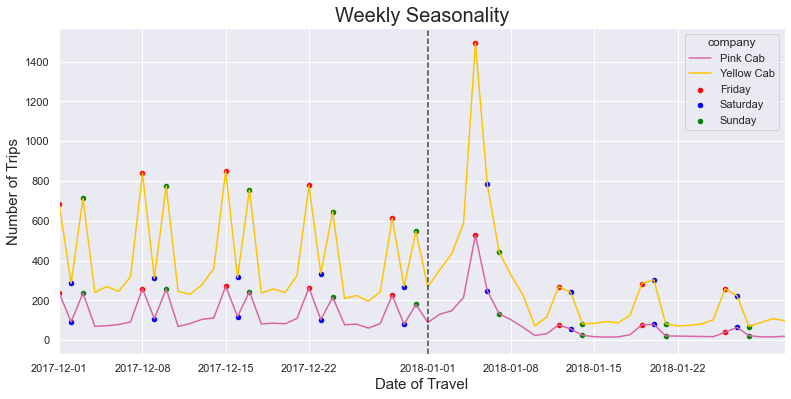

In [60]:
#2017 to 2018

plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'travel_date', y = 'count', data = trip, hue = 'company', 
             palette = palette);

plt.axvline(x = '2018-01-01', color = 'k', alpha = 0.8, linestyle = "--"); #To mark new year

for day, color in zip(['Friday', 'Saturday', 'Sunday'], ['red', 'blue', 'green']):
    trip.query(f"day == '{day}'")[['travel_date', 'count']].\
    plot.scatter(x = 'travel_date', y = 'count', ax = ax, label = f'{day}', color = color);

plt.title('Weekly Seasonality');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Trips');
plt.xlim("2017-12-01", "2018-01-31");

From 2017 to 2018, the pattern changes once again, this time, there is a peak of riders during friday, then saturday but then dips to down to low during sunday. <br>


Lets look closely into number of trips during the 5th January 2018.

In [61]:
daily_trip_city = full_df.groupby(['travel_date', 'city', 'company']).size().reset_index().\
                                                            rename(columns = {0 : 'count'})

daily_trip_city

travel_date            city     company  count
0      2016-01-02         ATLANTA    Pink Cab      1
1      2016-01-02         ATLANTA  Yellow Cab      4
2      2016-01-02          BOSTON    Pink Cab      2
3      2016-01-02          BOSTON  Yellow Cab      8
4      2016-01-02         CHICAGO    Pink Cab      7
...           ...             ...         ...    ...
32840  2018-12-31  SILICON VALLEY  Yellow Cab      4
32841  2018-12-31          TUCSON    Pink Cab      1
32842  2018-12-31          TUCSON  Yellow Cab      2
32843  2018-12-31      WASHINGTON    Pink Cab      1
32844  2018-12-31      WASHINGTON  Yellow Cab     29

[32845 rows x 4 columns]

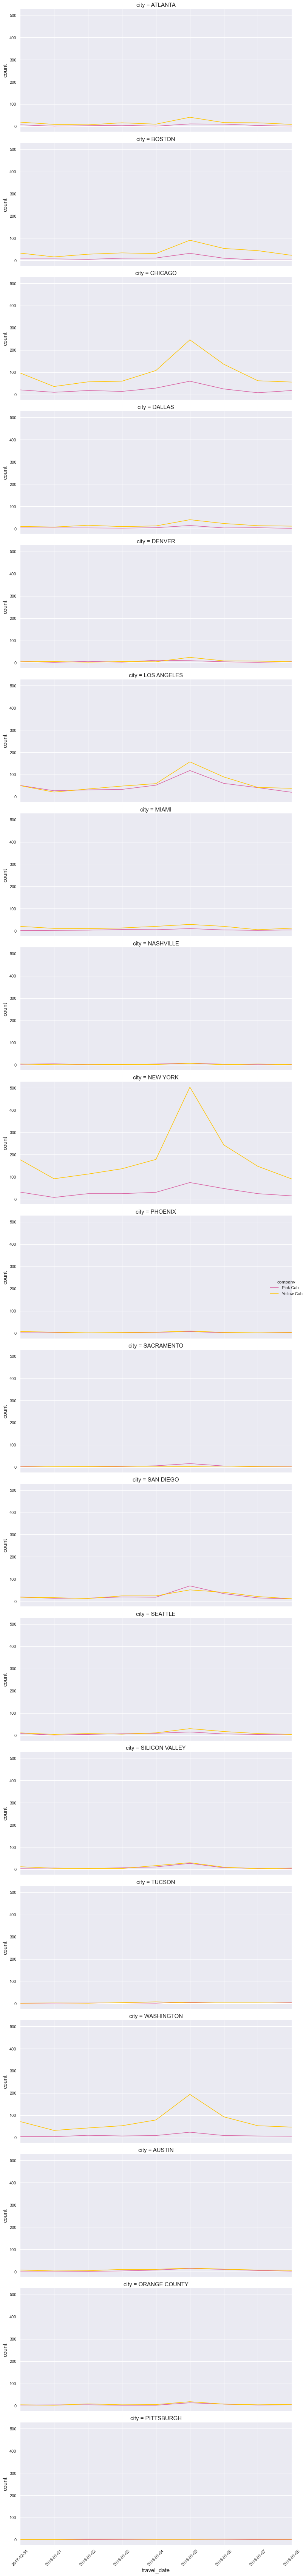

In [62]:
sns.relplot(x = 'travel_date', y = 'count', row = 'city', hue = 'company', 
            palette = palette, data = daily_trip_city, kind = 'line', aspect = 2);

plt.xlim("2017-12-31", "2018-01-08");
plt.xticks(rotation = 45);
plt.tight_layout();

The highest spike in the number of rides can be noticed in New York, followed by Chicago, Washington and Los Angeles. It is unknown why there was a spike in number of rides on this particular day. There was a blizzard storm in New York during the first week of January on 2018. Unfortunatly, I wasn't able to find any suitable weather datasets during this time period for any of the states. 

Next, I will visualize the data on a Month level basis.

In [63]:
#Aggregating at a month level to visualize month seasonality

month_trip = full_df.groupby(['year', 'month', 'company']).size().reset_index().\
                                                    rename(columns = {0:'count'})
month_trip

year  month     company  count
0   2016      1    Pink Cab    927
1   2016      1  Yellow Cab   3719
2   2016      2    Pink Cab   1050
3   2016      2  Yellow Cab   4674
4   2016      3    Pink Cab   1231
..   ...    ...         ...    ...
67  2018     10  Yellow Cab   9727
68  2018     11    Pink Cab   3897
69  2018     11  Yellow Cab  11230
70  2018     12    Pink Cab   3800
71  2018     12  Yellow Cab  11766

[72 rows x 4 columns]

In [64]:
month_trip['month_level'] = month_trip['year'].astype('str') + "-" + month_trip['month'].astype('str')
month_trip

year  month     company  count month_level
0   2016      1    Pink Cab    927      2016-1
1   2016      1  Yellow Cab   3719      2016-1
2   2016      2    Pink Cab   1050      2016-2
3   2016      2  Yellow Cab   4674      2016-2
4   2016      3    Pink Cab   1231      2016-3
..   ...    ...         ...    ...         ...
67  2018     10  Yellow Cab   9727     2018-10
68  2018     11    Pink Cab   3897     2018-11
69  2018     11  Yellow Cab  11230     2018-11
70  2018     12    Pink Cab   3800     2018-12
71  2018     12  Yellow Cab  11766     2018-12

[72 rows x 5 columns]

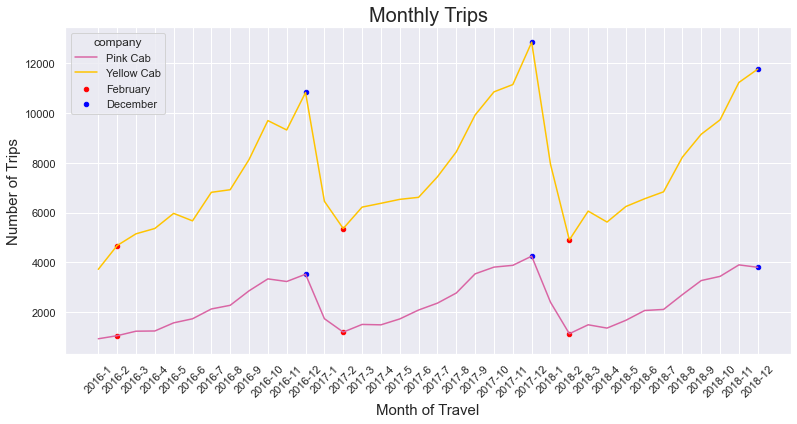

In [65]:
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'month_level', y = 'count', data = month_trip, hue = 'company', 
             palette = palette);

for month, name, color in zip([2,12], ['February', 'December'], ['red', 'blue']):
    month_trip.query(f"month == '{month}'")[['month_level', 'count']].\
    plot.scatter(x = 'month_level', y = 'count', ax = ax, label = f'{name}', color = color);

plt.xticks(rotation = 45)
plt.title('Monthly Trips');
plt.xlabel('Month of Travel');
plt.ylabel('Number of Trips');

When aggregating trips at a monthly level, again, there is a clear seasonality. The number of trips at the month of February is the lowest and the number of trips at the month of December is the highest for all the years. For both Cab companies, there is a slight upward trend  throughout the years.

##### Next, I will visualize monthly trips per city for both Cab companies

In [66]:
city_trips_month = full_df.groupby(['year', 'month', 'city', 'company']).size().\
                                    reset_index().rename(columns = {0:'count'})

city_trips_month['month_level'] = city_trips_month['year'].astype('str') + "_" + \
                                                city_trips_month['month'].astype('str')

city_trips_month

year  month            city     company  count month_level
0     2016      1         ATLANTA    Pink Cab     21      2016_1
1     2016      1         ATLANTA  Yellow Cab     85      2016_1
2     2016      1          AUSTIN    Pink Cab      7      2016_1
3     2016      1          AUSTIN  Yellow Cab     24      2016_1
4     2016      1          BOSTON    Pink Cab     72      2016_1
...    ...    ...             ...         ...    ...         ...
1363  2018     12  SILICON VALLEY  Yellow Cab    205     2018_12
1364  2018     12          TUCSON    Pink Cab     29     2018_12
1365  2018     12          TUCSON  Yellow Cab     50     2018_12
1366  2018     12      WASHINGTON    Pink Cab    188     2018_12
1367  2018     12      WASHINGTON  Yellow Cab   1500     2018_12

[1368 rows x 6 columns]

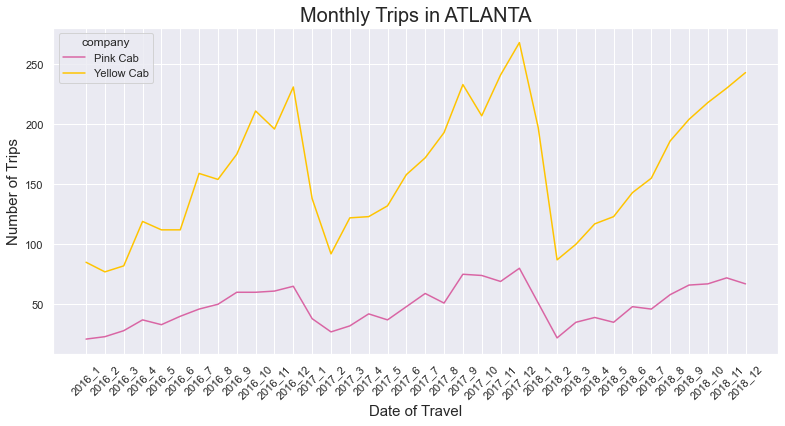

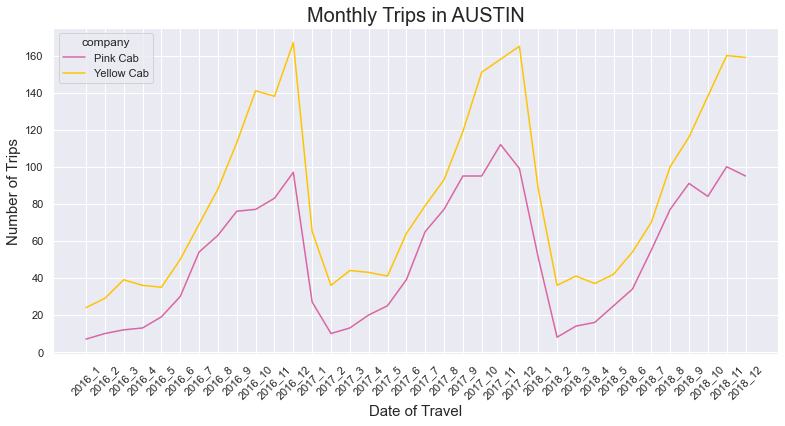

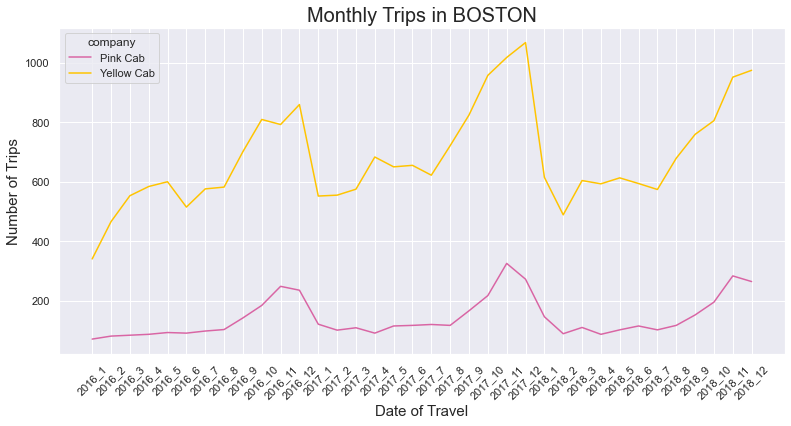

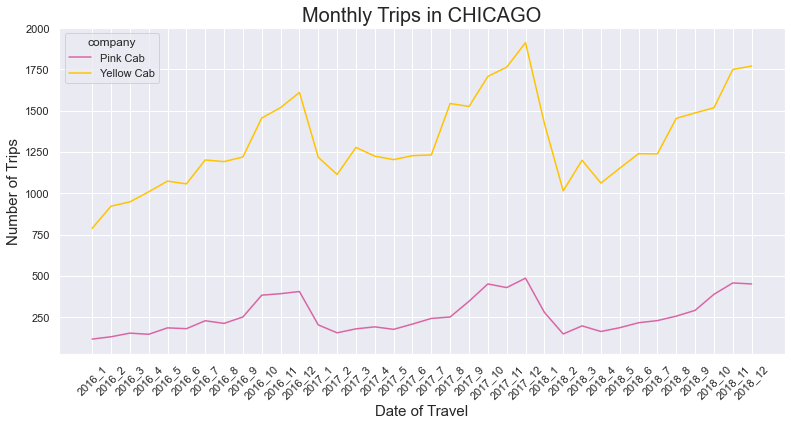

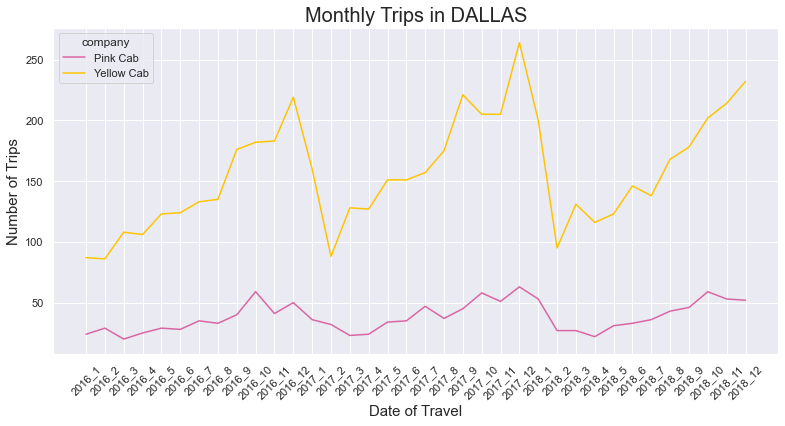

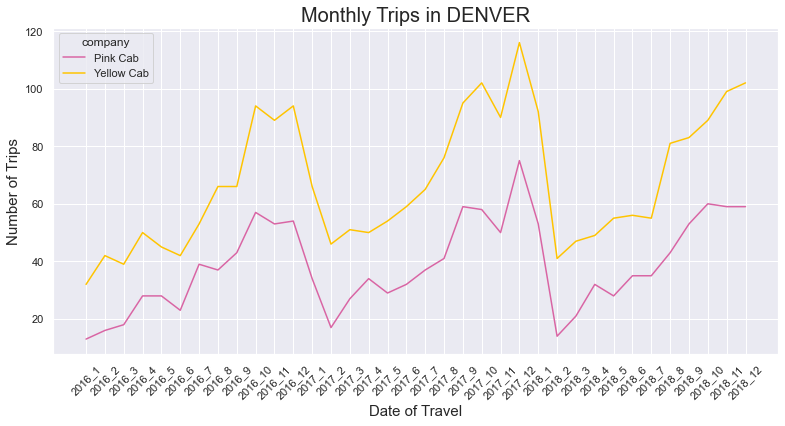

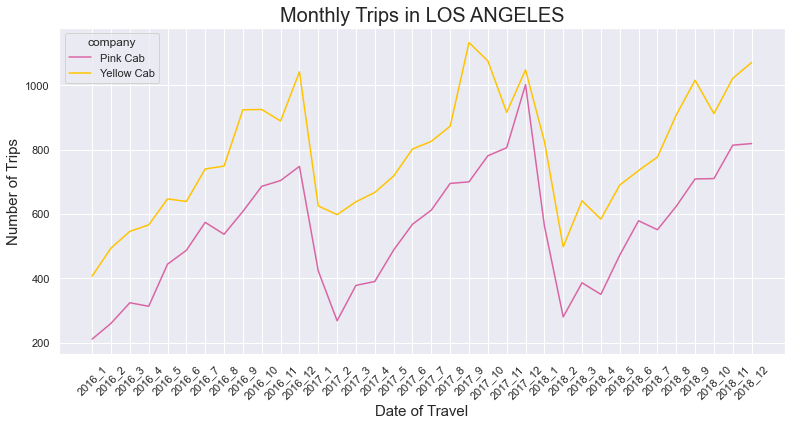

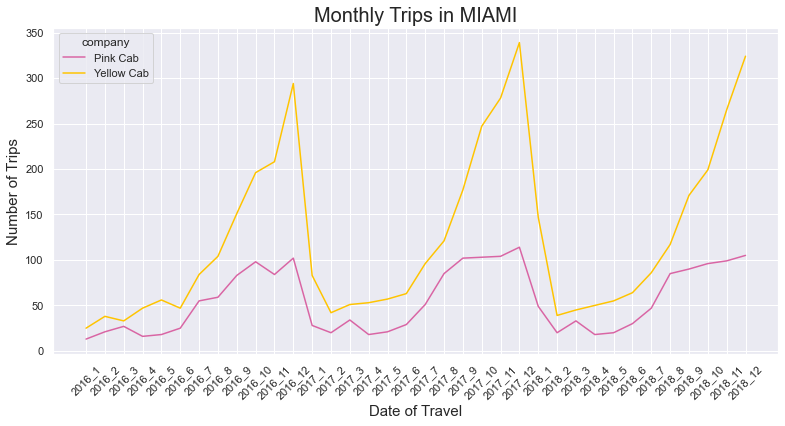

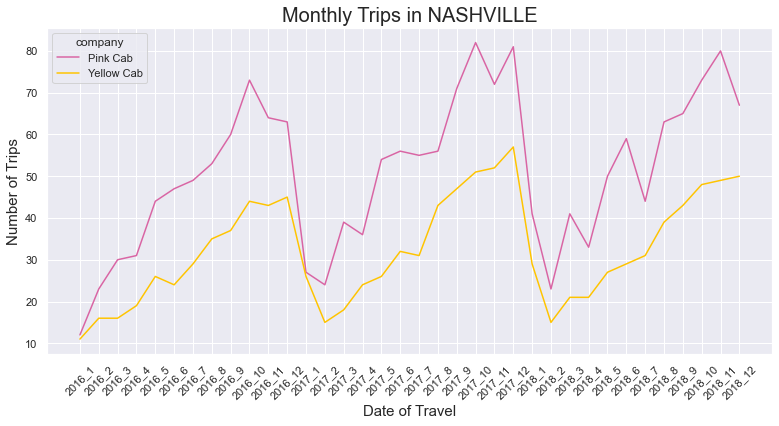

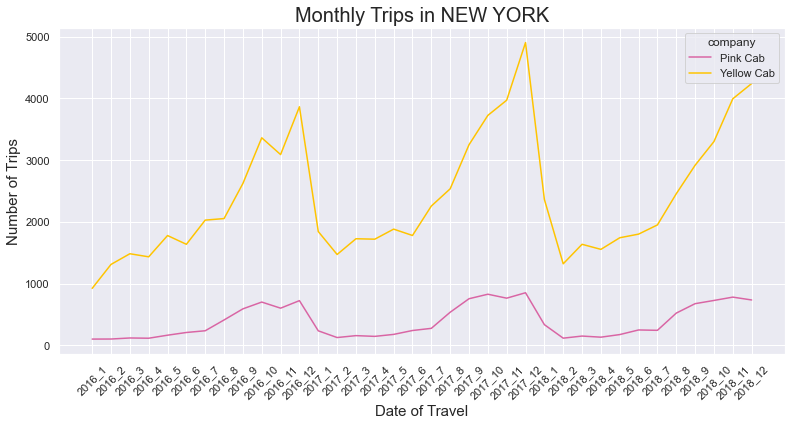

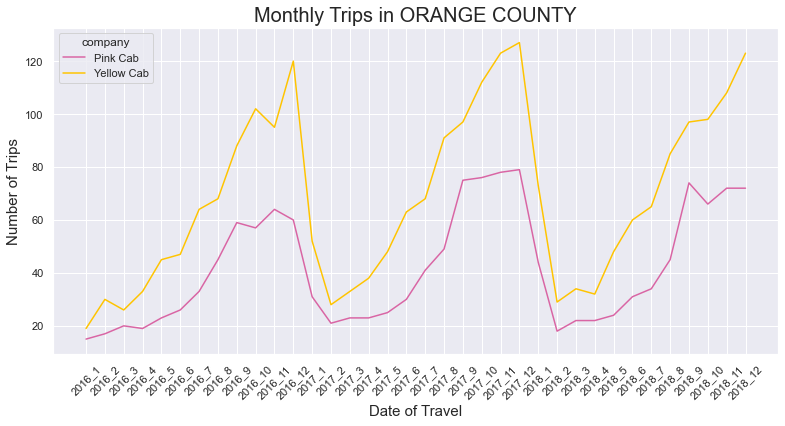

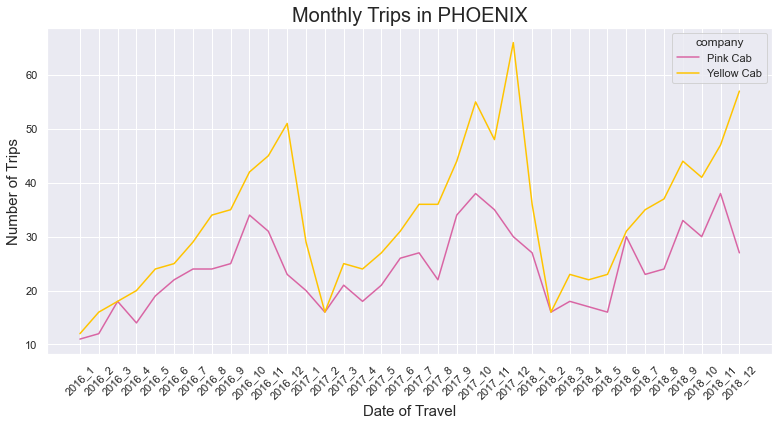

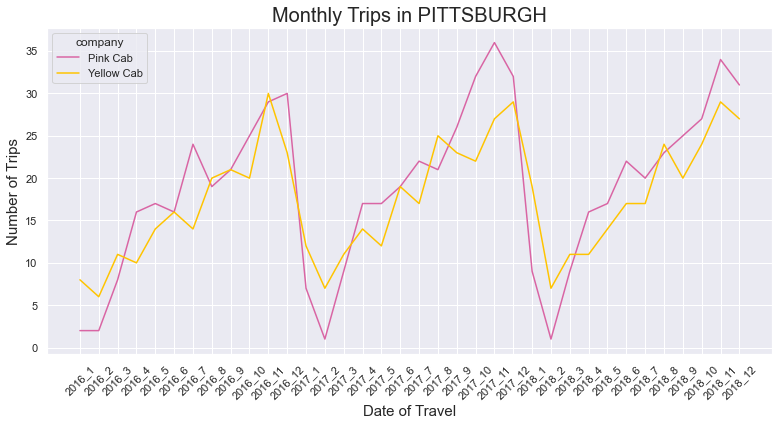

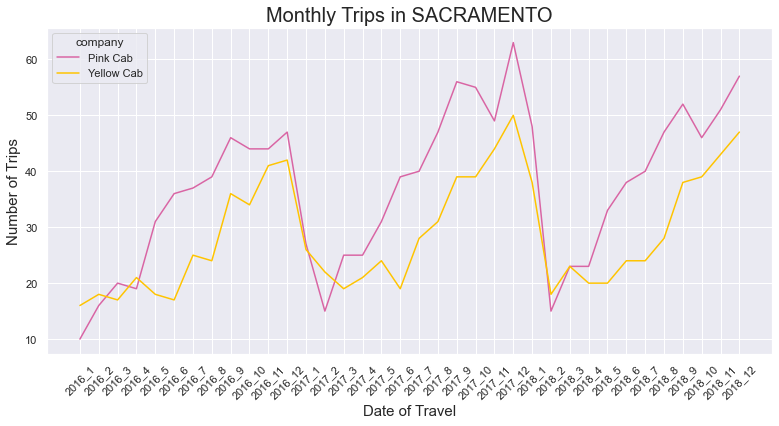

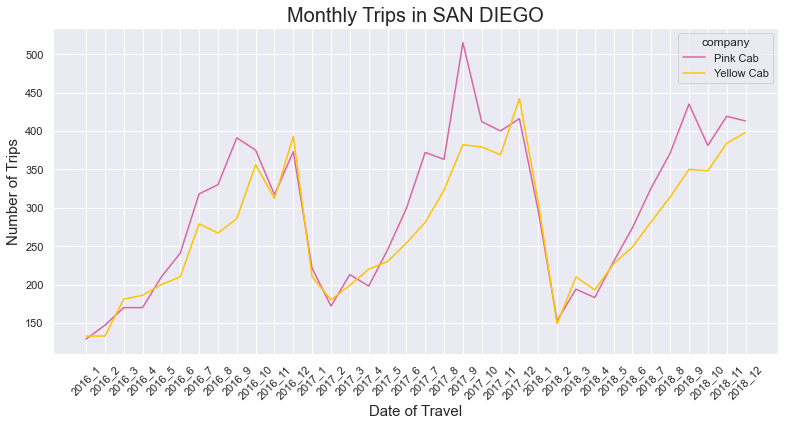

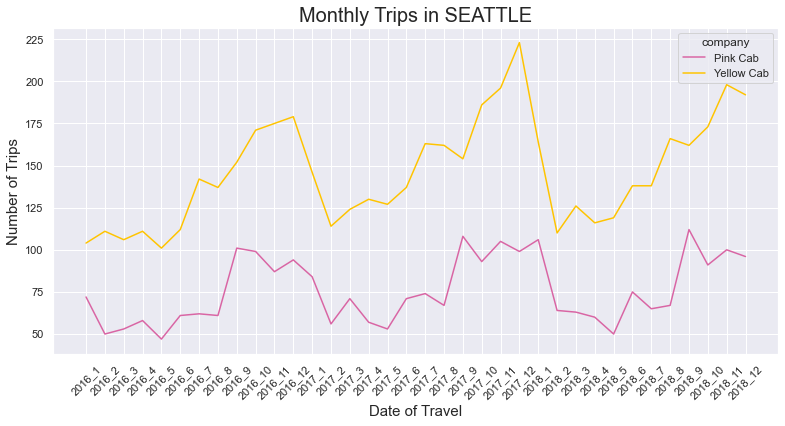

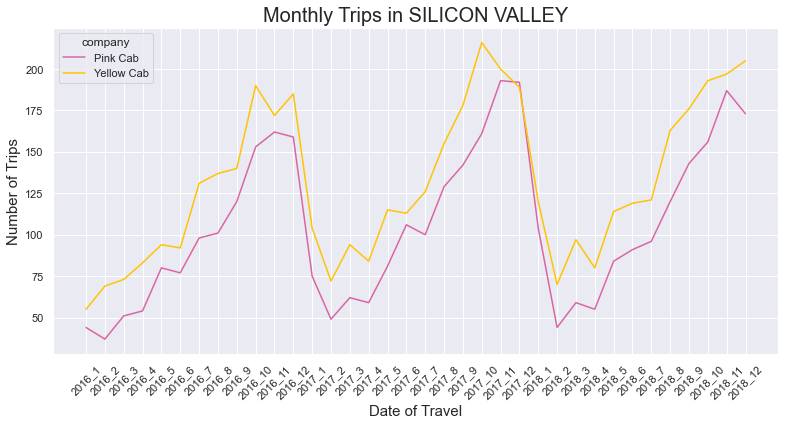

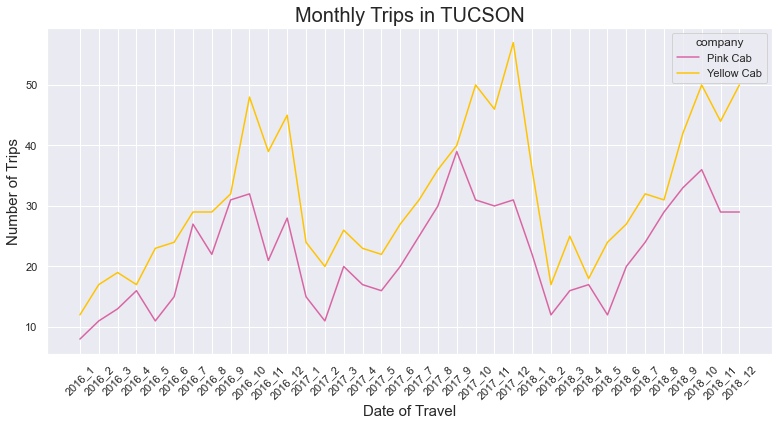

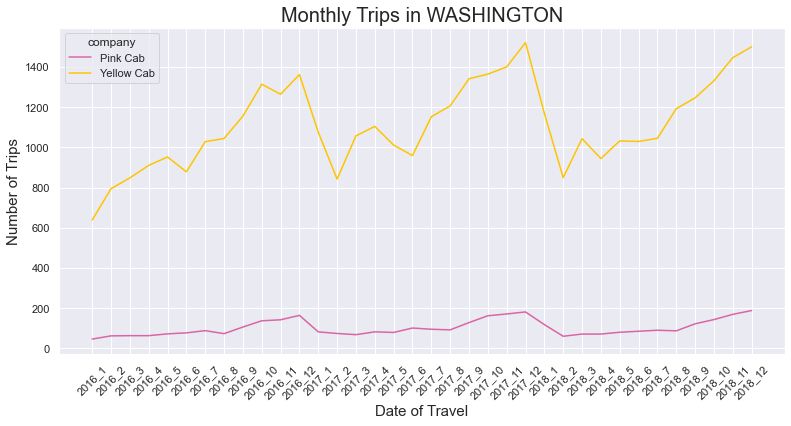

In [67]:
for i in city_trips_month.city.unique():
    plt.figure(figsize = (13,6))
    temp_df = city_trips_month.query(f"city == '{i}'")
    
    sns.lineplot(x = 'month_level', y = 'count', data = temp_df, hue = 'company', 
                 palette = palette);

    plt.title(f'Monthly Trips in {i}');
    plt.xlabel('Date of Travel');
    plt.ylabel('Number of Trips');
    plt.xticks(rotation = 45)

The above plots displays patterns at city level more clearly.
<br>
<br>
* $\color{yellow}{\text{Yellow Cab}}$ thrives on the following cities: **Atlanta, Austin, Boston, Chicago, Dallas, Denver, Los Angeles, Miami, New York, Orange County, Pheonix, Seattle, Silicon Valley, Tucson, Washington**.
<br>
<br>
* $\color{violet}{\text{Pink Cab}}$ thrives on the following cities: **Nashville and Sacremento**. 
<br>
<br>
In cities such as **Pittsburgh and Sandiego** both companies have almost the same number of rides.
<br>
<br>
Overall, $\color{yellow}{\text{Yellow Cab}}$ company seems to perform well in terms of the number of rides during the time period.

# Visualizing Trip information

#### What is the income made by the driver for each trip?

**Assumptions**

1) Due to limited avaiable data on the internet, I will assume that the expenses for the trip only involves fuel charges. 

2) There aren't sufficient data on the internet for the base fares per year for each city in the US. This will be left out of the analysis.

In [68]:
full_df['profit'] = full_df.price_charged - full_df.cost_of_trip #operating income
full_df

transaction_id     company        city  km_travelled  price_charged  \
0             10000013    Pink Cab     ATLANTA          9.04         125.20   
1             10000029    Pink Cab      BOSTON         21.34         324.21   
2             10000030    Pink Cab      BOSTON         41.30         646.06   
3             10000041    Pink Cab     CHICAGO         35.02         598.43   
4             10000045    Pink Cab     CHICAGO          3.24          48.04   
...                ...         ...         ...           ...            ...   
359387        10439960  Yellow Cab  WASHINGTON         33.93         474.47   
359388        10439984  Yellow Cab  WASHINGTON         40.00         641.78   
359389        10440028  Yellow Cab  WASHINGTON         26.22         405.25   
359390        10440034  Yellow Cab  WASHINGTON         34.68         505.38   
359391        10440093  Yellow Cab  WASHINGTON          4.32          60.41   

        cost_of_trip travel_date  customer_id payment_mode  gender  age  \
0            97.6320  2016-01-02        28712         Cash    Male   53   
1           226.2040  2016-01-02        58925         Card    Male   38   
2           454.3000  2016-01-02        58551         Card    Male   25   
3           406.2320  2016-01-02         4289         Card    Male   19   
4            33.6960  2016-01-02         5734         Card    Male   23   
...              ...         ...          ...          ...     ...  ...   
359387      411.2316  2018-12-31        52449         Card  Female   40   
359388      484.8000  2018-12-31        51614         Card  Female   55   
359389      327.2256  2018-12-31        52389         Card  Female   29   
359390      470.2608  2018-12-31        51877         Cash    Male   46   
359391       55.4688  2018-12-31        53810         Cash    Male   23   

        cust_income state  year  month  date  day_of_week    profit  
0             11242    GA  2016      1     2            5   27.5680  
1             26550    MA  2016      1     2            5   98.0060  
2             21734    MA  2016      1     2            5  191.7600  
3             28719    IL  2016      1     2            5  192.1980  
4             22475    IL  2016      1     2            5   14.3440  
...             ...   ...   ...    ...   ...          ...       ...  
359387        23569    DC  2018     12    31            0   63.2384  
359388        12279    DC  2018     12    31            0  156.9800  
359389         5568    DC  2018     12    31            0   78.0244  
359390        16993    DC  2018     12    31            0   35.1192  
359391        21455    DC  2018     12    31            0    4.9412  

[359392 rows x 18 columns]

In [69]:
full_df[['km_travelled', 'price_charged', 'cost_of_trip', 'profit']].describe().T

count        mean         std     min       25%      50%  \
km_travelled   359392.0   22.567254   12.233526    1.90   12.0000   22.440   
price_charged  359392.0  423.443311  274.378911   15.60  206.4375  386.360   
cost_of_trip   359392.0  286.190113  157.993661   19.00  151.2000  282.480   
profit         359392.0  137.253198  160.311840 -220.06   28.0120   81.962   

                    75%       max  
km_travelled    32.9600    48.000  
price_charged  583.6600  2048.030  
cost_of_trip   413.6832   691.200  
profit         190.0300  1463.966

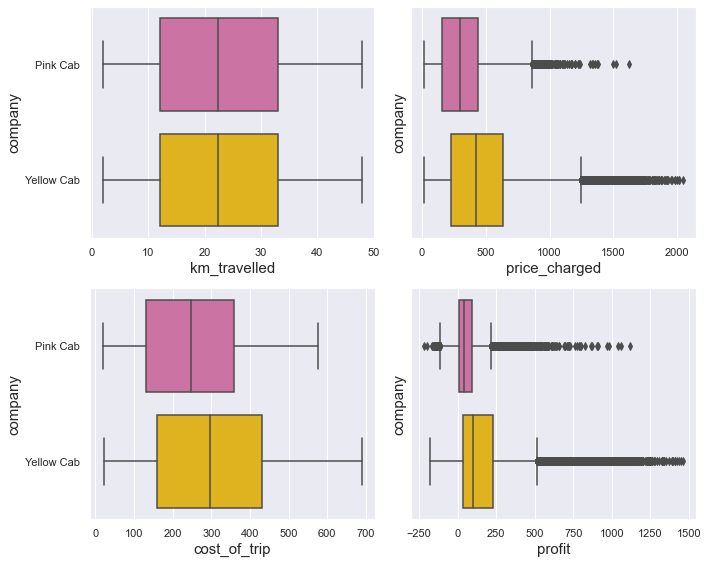

In [70]:
fig, axes = plt.subplots(2,2, figsize = (10,8), sharey = True)

for col, ax in zip(['km_travelled', 'price_charged', 'cost_of_trip', 'profit'], 
                   axes.flatten()):
    
    sns.boxplot(x = col, data = full_df, y = 'company', ax = ax, palette = palette);
    plt.tight_layout();

Above plots illustrates distribution of features related to the trip. The distributions of the distance travelled, Cab expenses all follow a uniform distribution. Only profit follows a gaussian distribution that is skewed to the right. <br>
<br>
There are high outliers on the right side of both profit and price charged columns.Both Cab companies has the same median distance travelled. $\color{yellow}{\text{Yellow Cab}}$ has a higher Cab expenses overall. The median price charged by $\color{violet}{\text{Pink Cab}}$ is lower than it's rival company. The profit of $\color{yellow}{\text{Yellow Cab}}$ is significantly higher. 
<br>
<br>
Both Cab companies has made some $\color{red}{\text{losses}}$, as is evidents on the left side of the profit box plots. I will take a closer look at this in the next sessions.

I have a hypothesis that the outliers in the price_charged variable might be due to Cabs offering 'Premium' services, where the company offers trips in luxury or high-end vehicles. In order to test this hypothesis, I will cap the price range according to the upper limit of the interquantile rage for both Cab company's price_charged variable. <br>
<br>
According to my hypothesis, customers who calls for premium cabs are richer and they would use premium cabs to travel any distance.

In [71]:
#For yellow cab

yc_IQR = full_df.query('company == "Yellow Cab"').price_charged.quantile(0.75) - \
         full_df.query('company == "Yellow Cab"').price_charged.quantile(0.25)

pc_IQR = full_df.query('company == "Pink Cab"').price_charged.quantile(0.75) - \
         full_df.query('company == "Pink Cab"').price_charged.quantile(0.25)

print(f'Yellow Cab IQR = {yc_IQR:.3f}')
print(f'Pink Cab IQR = {pc_IQR:.3f}')

distance = 1.5

yc_upper_limit = full_df.query('company == "Yellow Cab"').price_charged.quantile(0.75) + \
                 (yc_IQR * distance)

pc_upper_limit = full_df.query('company == "Pink Cab"').price_charged.quantile(0.75) + \
                 (pc_IQR * distance)

print()
print(f"Yellow Cab Upper Bounday = {yc_upper_limit:.3f}")
print(f"Pink Cab Upper Bounday = {pc_upper_limit:.3f}")

Yellow Cab IQR = 407.200
Pink Cab IQR = 281.535

Yellow Cab Upper Bounday = 1244.680
Pink Cab Upper Bounday = 863.807


In [72]:
#Creating new varibale called 'is_premium'. Premium trips are marked as 1.

is_premium = []

for i in range(len(full_df)):
    if full_df['company'][i] == 'Yellow Cab':
        if full_df['price_charged'][i] >= yc_upper_limit:
            is_premium.append(1)
        else:
            is_premium.append(0)
    else:
        if full_df['price_charged'][i] >= pc_upper_limit:
            is_premium.append(1)
        else:
            is_premium.append(0)
    
full_df['is_premium'] = is_premium

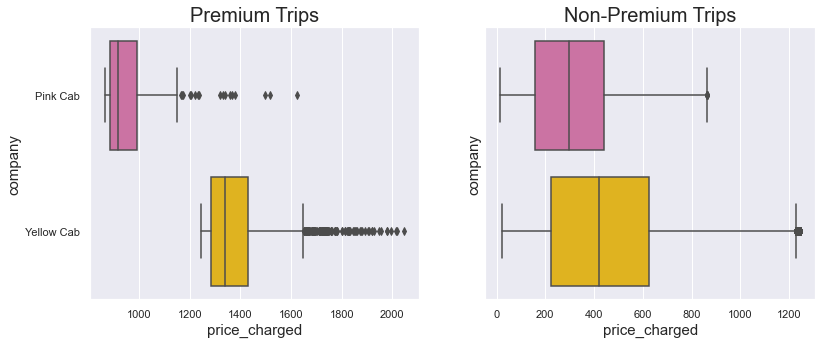

In [73]:
premium_trips = full_df.query('is_premium == 1')
non_premium_trips = full_df.query('is_premium == 0')

fig, ax = plt.subplots(1,2, figsize = (13,5), sharey = True)

sns.boxplot(x = 'price_charged', y = 'company', data = premium_trips, palette = palette, 
            order = ['Pink Cab', 'Yellow Cab'], ax = ax[0]).\
set_title('Premium Trips');


sns.boxplot(x = 'price_charged', y = 'company', data = non_premium_trips, palette = palette, ax = ax[1]).\
set_title('Non-Premium Trips');

From the above plots, price charged has been further splitted based on the premium category. Premium trips have a higher price range compared to non-premium trips. Almost all of the outliers within the non-premium trips has been removed. But for the premium trips, there are still outliers at the higher end of the `price_charged` variable.
<br>
<br>
Next, I will see how premium rides associate with Distance and customer income.

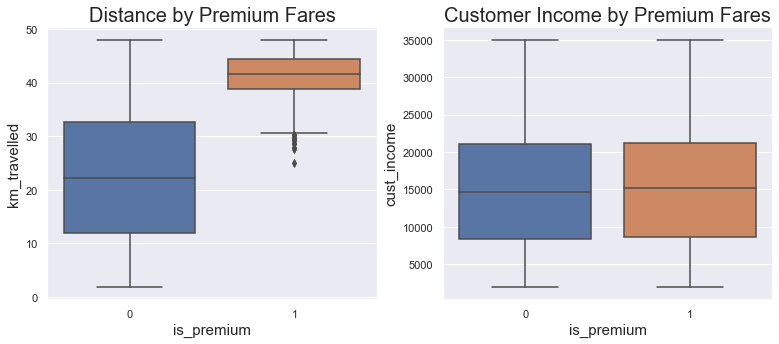

In [74]:
fig, ax = plt.subplots(1,2, figsize = (13,5))

sns.boxplot(y = 'km_travelled', x = 'is_premium', data = full_df, ax = ax[0]).\
set_title('Distance by Premium Fares');

sns.boxplot(y = 'cust_income', x = 'is_premium', data = full_df, ax = ax[1]).\
set_title('Customer Income by Premium Fares');

The above plots clearly illustrates that perhaps price_charged for the trips mainly depends on the distance travelled and that customer's income dont have much of an affect. Therefore, my hypothesis is wrong regarding the `price_charged` variable.

Next, I will visualize the data in a way that might reveal any correlation between these features. I will only take a sample of the data as it is computationally expensive to plot a pairplot using the whole dataset.

Wall time: 10.2 s


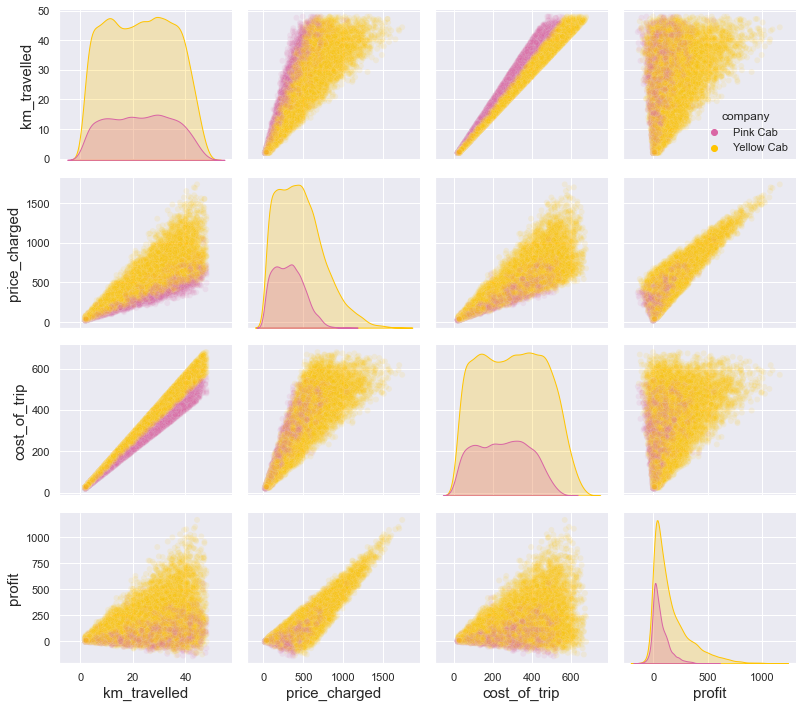

In [75]:
%%time
sampled_df_1 = full_df[['km_travelled', 'price_charged', 'cost_of_trip', 'profit', 
                      'company']].sample(frac = 0.05, random_state=42)

g = sns.pairplot(sampled_df_1, hue = 'company', hue_order = ['Pink Cab', 'Yellow Cab'], 
             palette = palette, plot_kws={'alpha': 0.1});

g._legend.set_bbox_to_anchor((0.98, 0.8))

plt.tight_layout()

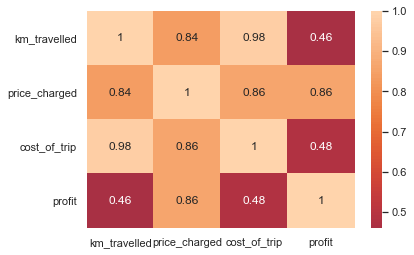

In [76]:
sns.heatmap(sampled_df_1.corr(), annot = True, center = 0);

The above plots clearly depicts that all features are correlated with each other. In general, as the distance of travel increases, both Cab expenses and Cab fares increases. The correlation is strong between distance travelled and Cab expenses. <br>
<br>
For price, expense and profit variables, **distance travelled is the compounding variable**.
<br>
<br>
For the operational expenses, there is a greater spread between all of the variables. When looking closely at the scatter plot between price charged and profit, the spread is higher when the price charged is low but the spread becomes less as the price charged increases.

#### Is daily number of trips and total distance travelled in a day correlated?

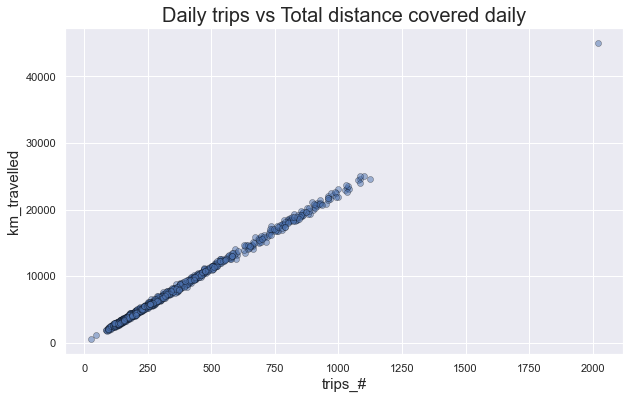

In [77]:
trip_distance_df = full_df.groupby('travel_date').agg({'km_travelled' : 'sum', 'city' : 'count'}).\
                   rename(columns = {'city' : 'trips_#'})

plt.figure(figsize = (10,6))
sns.scatterplot(x = 'trips_#', y = 'km_travelled', data = trip_distance_df, edgecolor = 'black', 
                alpha = 0.5).set_title("Daily trips vs Total distance covered daily");

There is a perfect correlation between number of trips and total distance travelled in a day. Therefore either one of these varibales determines both company's daily revenues, expenses and profits.

##### Loses

In this section, we look closely at the trips did not turn a profit.

In [78]:
loss = full_df.query("profit <= 0")
loss

transaction_id     company        city  km_travelled  price_charged  \
10            10000066    Pink Cab      DALLAS         13.13         122.42   
11            10000067    Pink Cab      DALLAS         33.32         308.58   
12            10000070    Pink Cab      DENVER          7.02          61.30   
34            10000356    Pink Cab     SEATTLE         14.95         171.47   
389           10000378    Pink Cab  WASHINGTON         29.75         295.60   
...                ...         ...         ...           ...            ...   
359335        10438112  Yellow Cab     CHICAGO         22.42         269.98   
359336        10438116  Yellow Cab     CHICAGO         36.58         435.76   
359338        10438152  Yellow Cab     CHICAGO         19.62         233.72   
359340        10438192  Yellow Cab     CHICAGO         38.61         469.94   
359386        10439934  Yellow Cab  WASHINGTON         38.11         510.48   

        cost_of_trip travel_date  customer_id payment_mode  gender  age  \
10          149.6820  2016-01-02        25155         Card    Male   27   
11          386.5120  2016-01-02        25247         Cash    Male   26   
12           82.8360  2016-01-02        30718         Cash    Male   52   
34          171.9250  2016-01-02        38635         Card    Male   31   
389         348.0750  2016-01-05        51246         Card    Male   61   
...              ...         ...          ...          ...     ...  ...   
359335      282.4920  2018-12-31         3095         Card    Male   33   
359336      487.2456  2018-12-31         5598         Card  Female   61   
359338      242.5032  2018-12-31         4354         Card  Female   34   
359340      509.6520  2018-12-31         3647         Card  Female   28   
359386      544.2108  2018-12-31        53878         Card  Female   27   

        cust_income state  year  month  date  day_of_week   profit  is_premium  
10            10997    TX  2016      1     2            5 -27.2620           0  
11            24178    TX  2016      1     2            5 -77.9320           0  
12            20255    CO  2016      1     2            5 -21.5360           0  
34            24682    WA  2016      1     2            5  -0.4550           0  
389            2035    DC  2016      1     5            1 -52.4750           0  
...             ...   ...   ...    ...   ...          ...      ...         ...  
359335        10614    IL  2018     12    31            0 -12.5120           0  
359336        11328    IL  2018     12    31            0 -51.4856           0  
359338         2114    IL  2018     12    31            0  -8.7832           0  
359340        23471    IL  2018     12    31            0 -39.7120           0  
359386        11610    DC  2018     12    31            0 -33.7308           0  

[24823 rows x 19 columns]

There are about 24823 trips which ended up having a loss instead of a profit.

#### How does the distribution of losses vary across all cities?

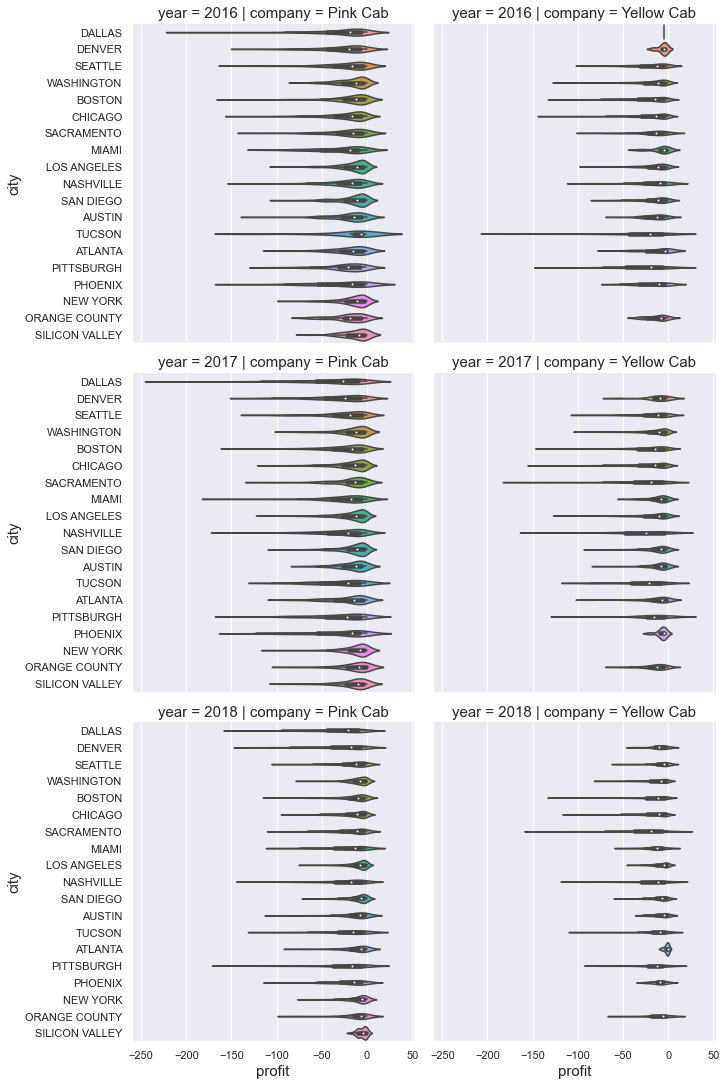

In [79]:
sns.catplot(y = 'city', x = 'profit', col = 'company', data = loss, kind = 'violin', row = 'year');

Although both companies has trips that did not make a profit, trips made my $\color{violet}{\text{Pink Cab}}$ across all cities for all three years has had a higher frequency of losses compared to $\color{yellow}{\text{Yellow Cab}}$. These losses could affect the overall profit margin of $\color{violet}{\text{Pink Cab}}$ 

#### At what timeline was the most total losses made by both companies?

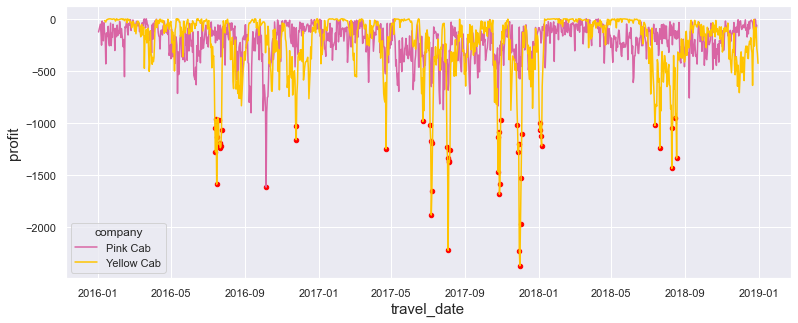

In [80]:
total_loss = loss.groupby(['travel_date', 'company']).sum()['profit'].sort_values().reset_index()

plt.figure(figsize = (13,5))

ax = sns.lineplot(x = 'travel_date', y = 'profit', data = total_loss, hue = 'company', 
             hue_order = ['Pink Cab', 'Yellow Cab'], palette = palette);

total_loss.loc[:50, ["travel_date", "profit"]].plot.scatter("travel_date", "profit", 
                                                            color = 'red', ax = ax);

The above plot shows a timeline of trips that only made losses which is aggregated at a daily level by summing up the losses. Here, $\color{yellow}{\text{Yellow Cab}}$  has had a series of total losses every year. What's noticable is a pattern. There are a few cluster of losses during certain time periods at particular months, most noticable during the months of July and August. 

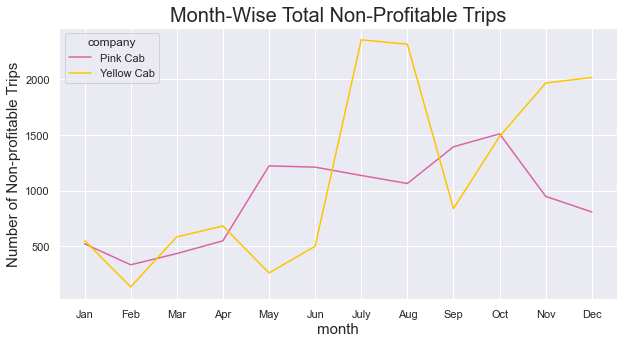

In [81]:
month_loss_count = loss.groupby(['month', 'company']).size().reset_index().\
                                                        rename(columns = {0:'count'})

plt.figure(figsize = (10,5))
sns.lineplot(x = 'month', y = 'count', hue = 'company', data = month_loss_count, 
             palette = palette);

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(np.arange(1,13,1), labels = months);
plt.ylabel('Number of Non-profitable Trips');
plt.title("Month-Wise Total Non-Profitable Trips");

From the above plot, we can deduce that $\color{yellow}{\text{Yellow Cab}}$ makes the highest non-profitable trips during the months of July, August, November and December. For $\color{violet}{\text{Pink Cab}}$, it is during September and October.

#### I will test the hypothesis if losses differs across months.

In [82]:
loss_month_profit = loss[['month', 'profit']]
loss_month_profit

month   profit
10          1 -27.2620
11          1 -77.9320
12          1 -21.5360
34          1  -0.4550
389         1 -52.4750
...       ...      ...
359335     12 -12.5120
359336     12 -51.4856
359338     12  -8.7832
359340     12 -39.7120
359386     12 -33.7308

[24823 rows x 2 columns]

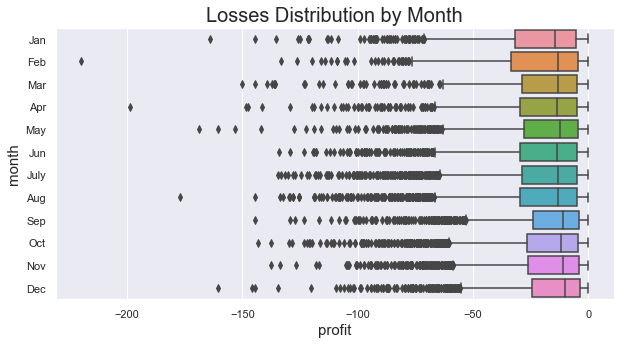

In [83]:
plt.figure(figsize = (10,5));
ax = sns.boxplot(y = 'month', x = 'profit', data = loss_month_profit, orient = 'h').\
set_title("Losses Distribution by Month");

plt.yticks(np.arange(0,12,1), labels = months);

The distribution of losses are all skewed across all months. The above plot does not follow the assumptions of an ANOVA one-way test as the distribution is skewed. Therefore I will employ a non-paramteric test called 'Kruskal-Wallis H-test'. It is a non-parametric version of ANOVA.
<br>
<br>
The Kruskal-Wallis H-test tests the null hypothesis that the population **median** of all of the groups are equal.
<br>
<br>
Therefore, I will employ this test to check whether any associations exists between month and losses made.

In [84]:
#creating arrays of profit(losses) for each month

jan = loss_month_profit.query('month == 1')['profit'].values
feb = loss_month_profit.query('month == 2')['profit'].values
mar = loss_month_profit.query('month == 3')['profit'].values
apr = loss_month_profit.query('month == 4')['profit'].values
may = loss_month_profit.query('month == 5')['profit'].values
jun = loss_month_profit.query('month == 6')['profit'].values
jul = loss_month_profit.query('month == 7')['profit'].values
aug = loss_month_profit.query('month == 8')['profit'].values
sep = loss_month_profit.query('month == 9')['profit'].values
octr = loss_month_profit.query('month == 10')['profit'].values
nov = loss_month_profit.query('month == 11')['profit'].values
dec = loss_month_profit.query('month == 12')['profit'].values

#### * **Null hypothesis**: Monthly profit medians are equal (no variation in means of groups). <br>
H0: m1=m2=…=mp
<br>
<br>
#### * **Alternative hypothesis**: At least one monthly profit median is different from other months. <br>
H1: All μ are not equal

In [85]:
from scipy import stats

alpha = 0.05
H, p = stats.kruskal(jan, feb, mar, apr, may, jun, jul, aug, sep, octr, nov, dec)

print(f'H-Value: {H:.3f}')
print(f'P-value: {p:.3f}')
print()

alpha = 0.01

if p <= alpha:
    print('P-value less than alpha - Reject H0')
else:
    print('P-value higher than alpha - Cannot Reject H0')

H-Value: 120.943
P-value: 0.000

P-value less than alpha - Reject H0


The above tests signifies that the median losses differs across months and that losses are higher during some particular months.

#### In which city does both companies makes  most bad trips?

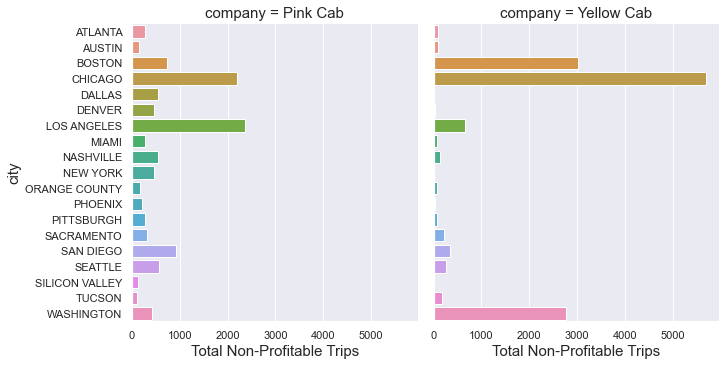

In [86]:
loss_city = loss.groupby(['city', 'company']).size().reset_index().rename(columns = {0:'count'})

g = sns.catplot(y = 'city', x = 'count', col = 'company', data = loss_city, kind = 'bar');

g.set_xlabels("Total Non-Profitable Trips");

According to the data, the most number of non-profit trips made by $\color{yellow}{\text{Yellow Cab}}$ was on Chicago, Boston, Washington and Los Angeles. For $\color{violet}{\text{Pink Cab}}$, its mostly on Chicago and Los Angeles.

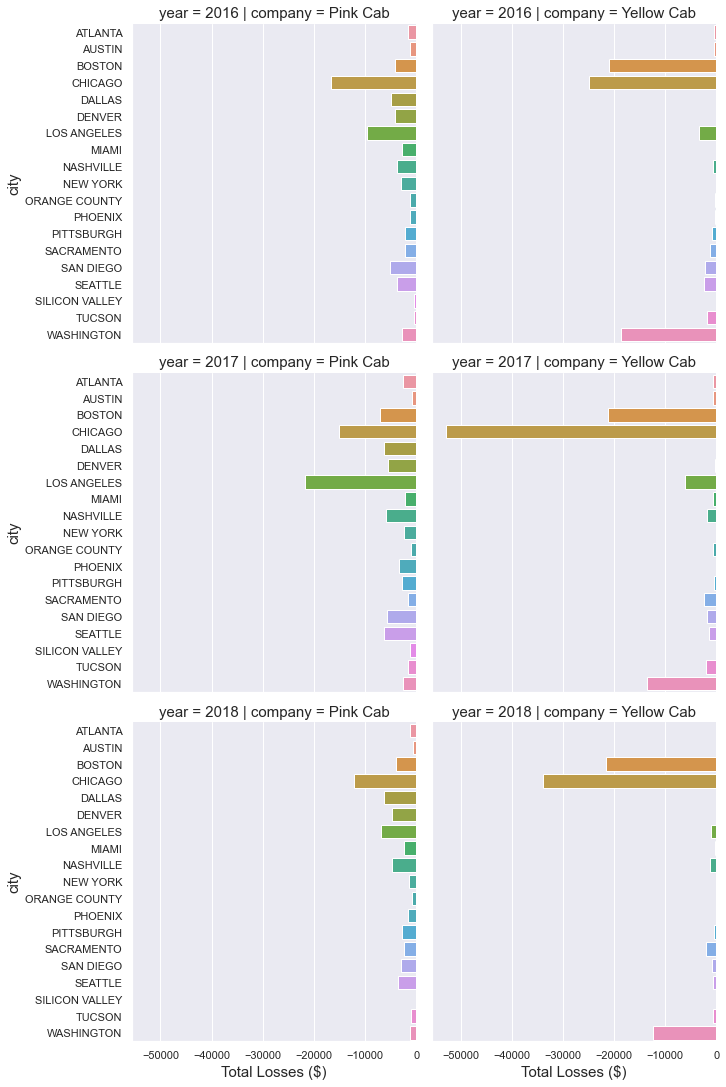

In [87]:
loss_year_city = loss.groupby(['year', 'city', 'company']).sum()['profit'].reset_index()

g = sns.catplot(y = 'city', x = 'profit', col = 'company', row = 'year', data = loss_year_city, 
                kind = 'bar');

g.set_xlabels("Total Losses ($)");

For $\color{yellow}{\text{Yellow Cab}}$, losses made from non-profit trips was the higest on Chicago during 2017. For $\color{violet}{\text{Pink Cab}}$, it was on Los Angeles during 2017.

#### How much does the monthly Cab Fare, Cab expenses and profit vary across all states for both Cab companies?

In [88]:
#Grouping by year, month, state and company and taking the median of Cab fare and expenses

#I take the median, as the distribution of both profit and price charged in heavily skewed to the right.

cab_monthly_finances = full_df.groupby(['year', 'month', 'state', 'company']).\
median()[['price_charged', 'cost_of_trip', 'profit']].reset_index()

#Concatenating year and month into a single column
cab_monthly_finances['month_level'] = cab_monthly_finances['year'].astype('str') + "-" + \
                                                cab_monthly_finances['month'].astype('str')

#dropping individual year and month column
cab_monthly_finances.drop(['year', 'month'], axis = 1, inplace = True)

#unpivoting price charge and cost of trip in order to make it easier to plot both in a single axis
cab_monthly_finances = cab_monthly_finances.melt(id_vars = ['state', 'company', 'month_level'], 
                                                 var_name = 'inc_exp', value_name = 'amount')

cab_monthly_finances

state     company month_level        inc_exp    amount
0       AZ    Pink Cab      2016-1  price_charged  140.7000
1       AZ  Yellow Cab      2016-1  price_charged  405.4450
2       CA    Pink Cab      2016-1  price_charged  363.6000
3       CA  Yellow Cab      2016-1  price_charged  496.2900
4       CO    Pink Cab      2016-1  price_charged  191.2000
...    ...         ...         ...            ...       ...
2803    TN  Yellow Cab     2018-12         profit   42.5666
2804    TX    Pink Cab     2018-12         profit   51.5500
2805    TX  Yellow Cab     2018-12         profit   88.8220
2806    WA    Pink Cab     2018-12         profit   53.4515
2807    WA  Yellow Cab     2018-12         profit   59.8408

[2808 rows x 5 columns]

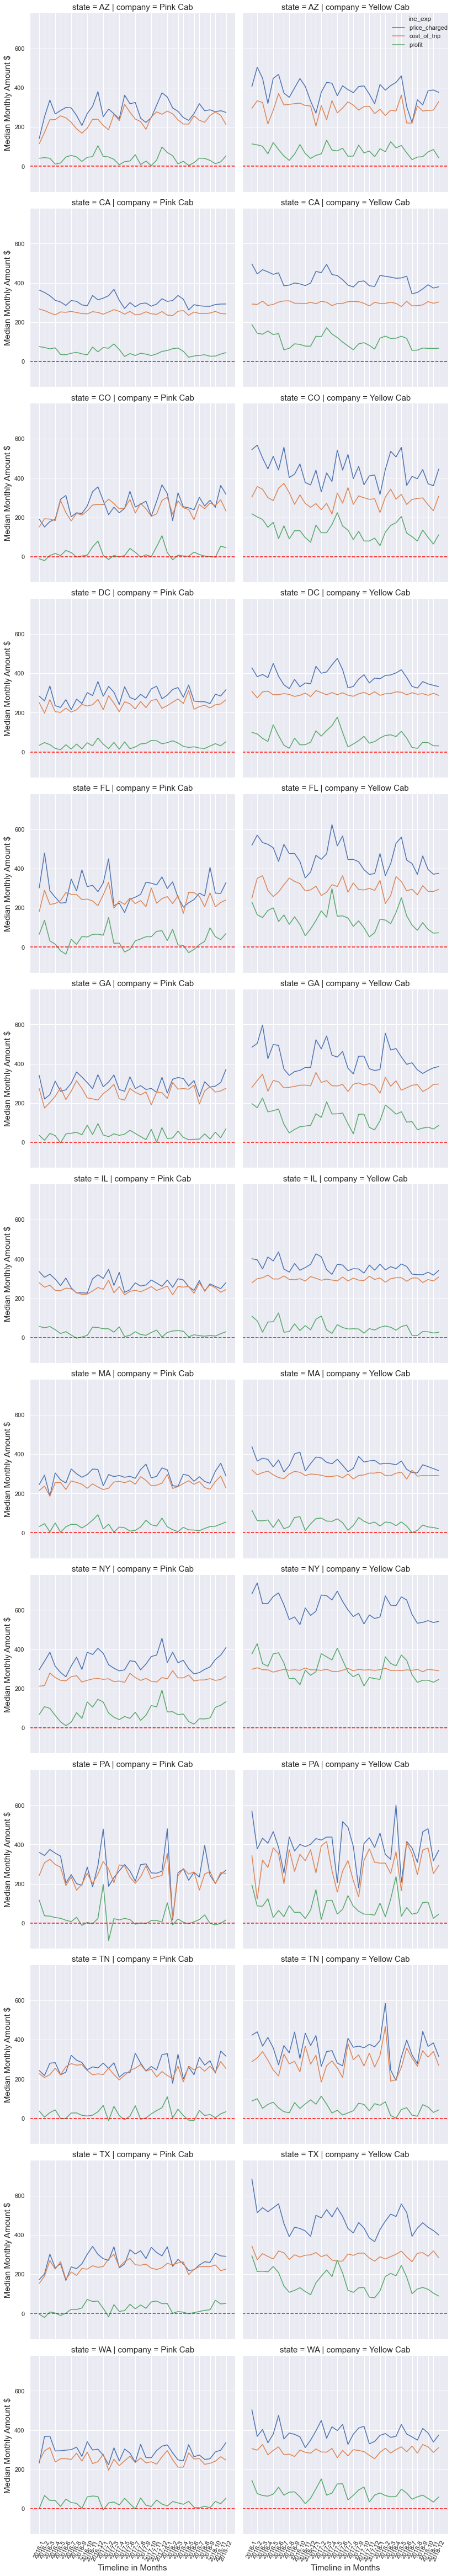

In [89]:
g = sns.relplot(y = 'amount', x = 'month_level', data = cab_monthly_finances, kind = 'line', 
                hue = 'inc_exp', row = 'state', col = 'company');

axes = g.axes.flatten()

for ax in axes:
    ax.axhline(0, ls='--', color='red') #to mark profit below zero

g.set_xticklabels(rotation=65);
plt.tight_layout();

g.set_ylabels("Median Monthly Amount $");
g.set_xlabels("Timeline in Months");
g._legend.set_bbox_to_anchor((0.99, 0.985))

The above plots represents the monthly median Cab fares and Cab expenses for both companies across all states. The $\color{blue}{\text{blue line}}$ represents the average $\color{blue}{\text{price charged}}$ for the trips and the $\color{orange}{\text{orange line}}$ represents the $\color{orange}{\text{cab expenses}}$. $\color{green}{\text{green line}}$ represents the $\color{green}{\text{profit}}$.
The $\color{red}{\text{red line}}$ marks the border where any amount (mainly $\color{green}{\text{profit}}$) below zero is $\color{red}{\text{losses}}$. These are my observations:
<br>
* Across all states, $\color{yellow}{\text{Yellow Cab}}$ has higher $\color{orange}{\text{cab expenses}}$ compared to $\color{violet}{\text{Pink Cab}}$. 
<br>
<br>
* In general, $\color{violet}{\text{Pink Cab}}$ has lower $\color{blue}{\text{price charged}}$ compared to $\color{yellow}{\text{Yellow Cab}}$. This is especially discernible in the state of New York.
<br>
<br>
* Like $\color{blue}{\text{price charged}}$, $\color{green}{\text{profit}}$ for $\color{yellow}{\text{Yellow Cab}}$ is higher than it's rival. Both $\color{blue}{\text{price charged}}$ and $\color{green}{\text{profit}}$ follows the same pattern.
<br>
<br>
* For the state of New York, which has the highest Cab passengers compared to any other states, $\color{yellow}{\text{Yellow Cab}}$ has the highest Cab Fares compared to $\color{violet}{\text{Pink Cab}}$ during the same timeline. $\color{yellow}{\text{Yellow Cab's}}$ $\color{green}{\text{profit}}$ is significantly higher in New York compared to any other state.
<br>
<br>
* There is an interesting pattern for the state of PA (Pennsylvania). During February 2018, both Cab fares and Cab expenses of $\color{violet}{\text{Pink Cab}}$ dipped way below the norm. At that same time period, the Cab Fares of $\color{yellow}{\text{Yellow Cab}}$ has shown a significant spike.
<br>
<br>
* Both Cab companies makes median $\color{red}{\text{losses}}$ during time periods across all states. This is more frequent for $\color{violet}{\text{Pink Cab}}$ in states such as Colorado, Florida, Georgia, Illanois, Massachusetts, Pennsylvania, Tennessee, Texas and Washington. For $\color{yellow}{\text{Yellow Cab}}$, there are barely any months making median $\color{red}{\text{losses}}$. This could signify that $\color{yellow}{\text{Yellow Cab}}$ perform better across all states and any $\color{red}{\text{losses}}$ it makes from non-profit trips will be easily offsetted by the amount of $\color{green}{\text{profit}}$ it makes.

It is important to note that for all the three variables, there is a confounding variable, which is the distance travelled (`km_travelled`). Perhaps binning this variable will help help in further analysis.

### Distance (`km_travelled`)

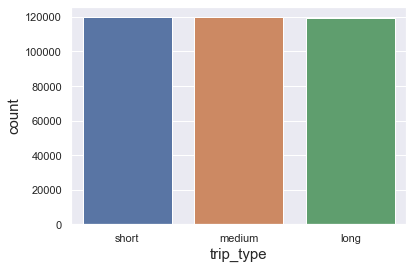

In [90]:
#Binning km_travelled in to 3 equal freq quantiles.

full_df['trip_type'] = pd.qcut(full_df.km_travelled, 3, labels = ['short', 'medium', 'long'])
#Short distance = 1.899 to 15.47 km
#medium distance = 15.47 to 29.4 km
#Short distance = 29.4 to 48.0 km

sns.countplot(full_df.trip_type);

All trip durations have equal occurences according to the data.

#### How does price charged vary with different trip intervals at State level?

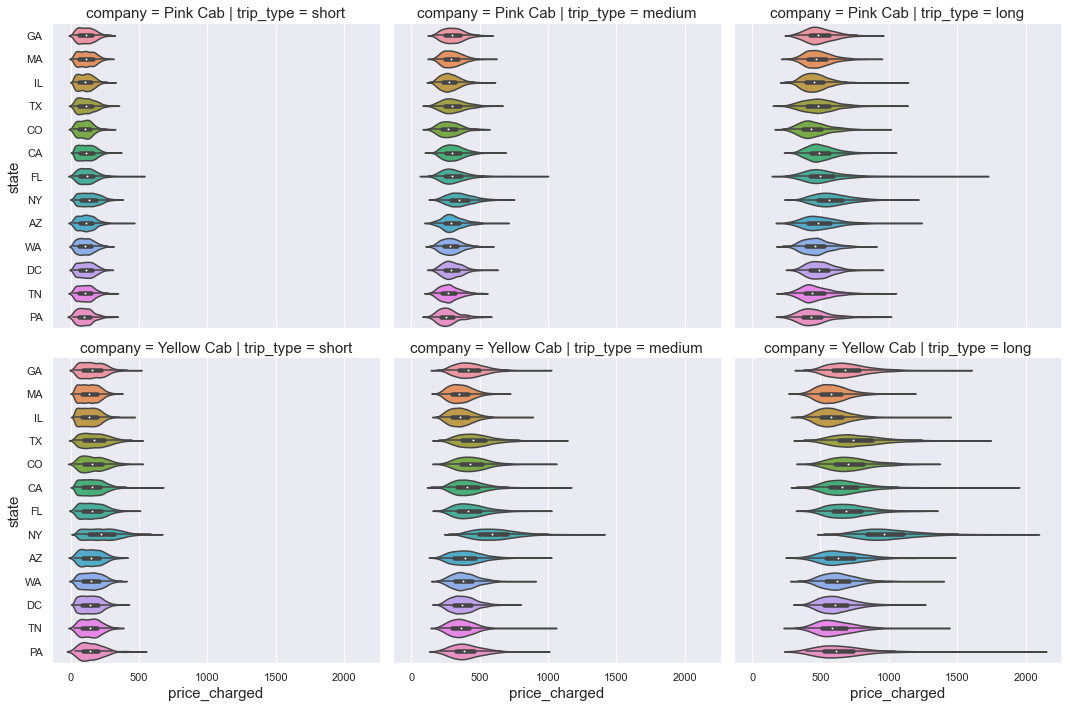

In [91]:
sns.catplot(x = 'price_charged', y = 'state', data = full_df, row = 'company', kind = 'violin', 
           col = 'trip_type');

plt.tight_layout()

From the above plots, the price charged for short distance trips by both cab companies across all states are roughly the same, except for New York. As the distance increases, more variations in prices charged across all states is observed for $\color{yellow}{\text{Yellow Cab}}$. Comparatively, prices charged for a particular distance category by $\color{violet}{\text{Pink Cab}}$ remains roughly the same across all states.

#### How does Expenses vary with different trip intervals at State level?

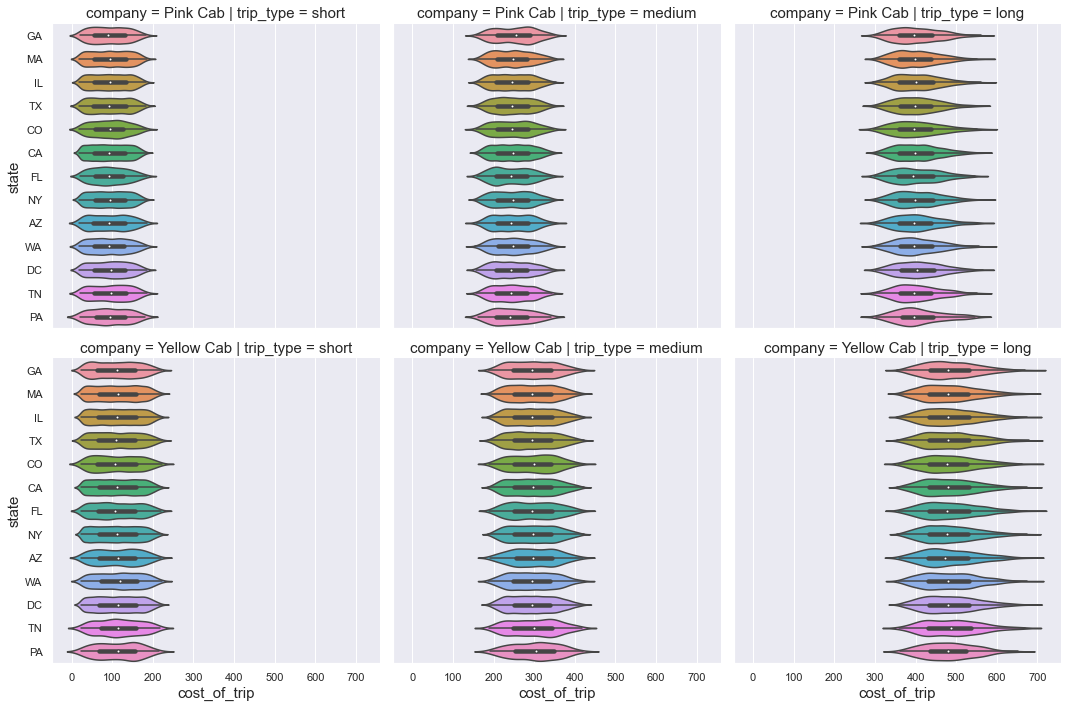

In [92]:
sns.catplot(x = 'cost_of_trip', y = 'state', data = full_df, row = 'company', kind = 'violin', 
           col = 'trip_type');

plt.tight_layout()

Cab expenses remains uniform at different trip intervals across all states.

#### How does profit vary with different trip intervals at State level?

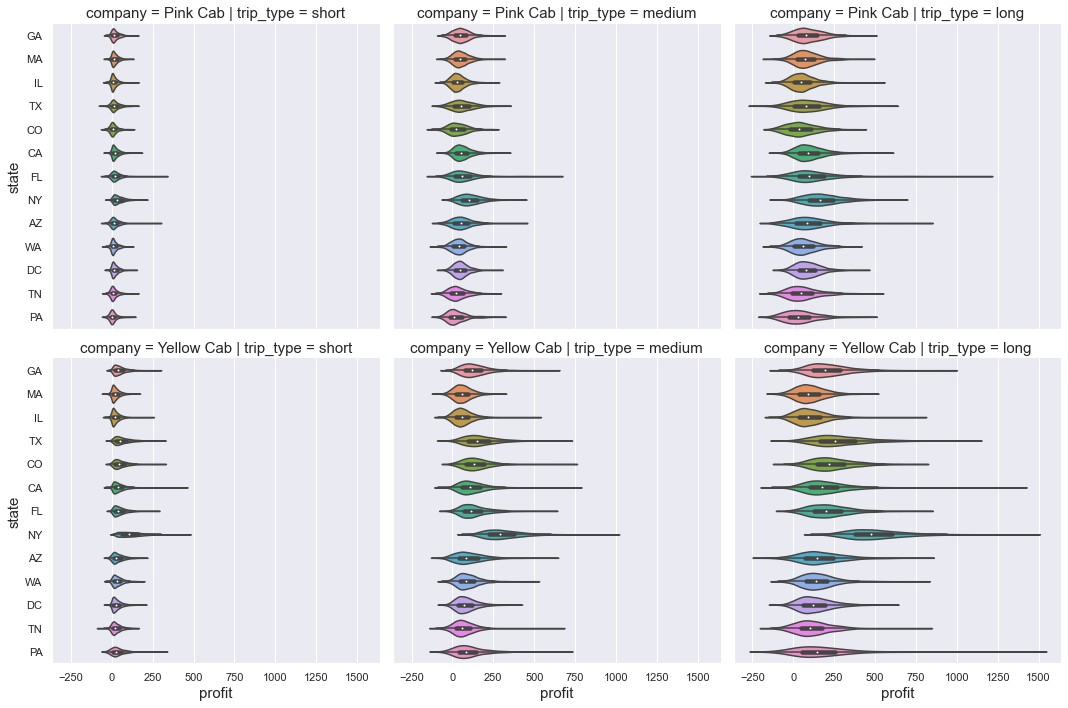

In [93]:
sns.catplot(x = 'profit', y = 'state', data = full_df, row = 'company', kind = 'violin', 
           col = 'trip_type');

plt.tight_layout()

From the above plot, there is a higher probability of making high profits when the trip duration is long across all states.

#### At which distance interval most non-profit trips are made by both companies?

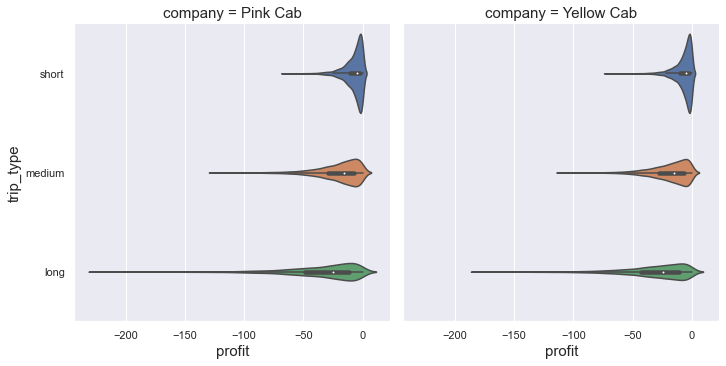

In [94]:
loss_dist = full_df.query("profit < 0")[['profit', 'company', 'trip_type']]

g = sns.catplot(x = 'profit', y = 'trip_type', col = 'company', data = loss_dist, kind = 'violin');

For both Cab companies, short trips results in higher frequency of losses. Losses made during medium trips are roughly the same for both. For long trips, although the frequncy is less compared to other two intervals, there is a small probability to make higher losses. $\color{violet}{\text{Pink Cab}}$ has has trips with the highest losses compared to it's rival.

#### How does Distance affect the price, costs and profit?

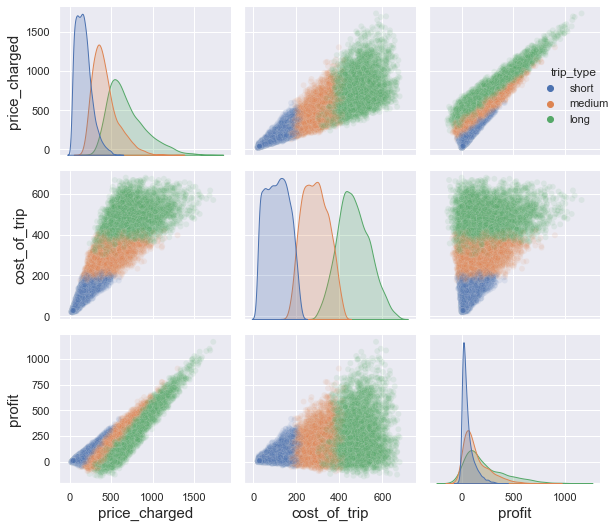

In [95]:
sampled_df_2 = full_df[['price_charged', 'cost_of_trip', 'profit', 'trip_type']].\
sample(frac = 0.05, random_state=42)

g = sns.pairplot(sampled_df_2, hue = 'trip_type', plot_kws={'alpha': 0.1});

g._legend.set_bbox_to_anchor((1, 0.8))
plt.tight_layout();

The above plots depicts at each distance intervals, the price, profit and costs increases, although there is a higher variablity in all variables as the distance increases.

Next, I will bin `profit` into different levels and see it's relation with distance.

In [96]:
bins = [-221, 0.00001, 30.5, 85.5, 200.5, 800.5, 1464]
#Here, I assume where that profit = 0 is also loss.

label = ['loss', 'low', 'average', 'above-average', 'high', 'highest']

full_df['profit_level'] = pd.cut(full_df.profit, bins = bins, labels = label)

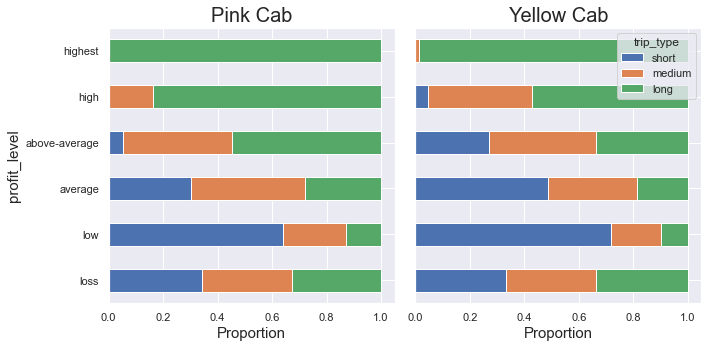

In [97]:
fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True, tight_layout = True);

pd.crosstab(index = full_df.query("company == 'Pink Cab'").profit_level, 
            columns = full_df.query("company == 'Pink Cab'").trip_type, normalize = 'index').\
plot(kind = 'barh', stacked = True, ax = ax[0], title = "Pink Cab", legend = False);

ax[0].set_xlabel('Proportion');

pd.crosstab(index = full_df.query("company == 'Yellow Cab'").profit_level, 
            columns = full_df.query("company == 'Yellow Cab'").trip_type, 
            normalize = 'index').plot(kind = 'barh', stacked = True, ax = ax[1], 
                                     title = "Yellow Cab");

ax[1].set_xlabel('Proportion');

The above plots depicts proportion of trip_intervals that contributes to each profit level for both companies. For the loss category (where profit <= 0), all three trip durtions have equal intervals, which could mean that distance might not be the main factor contributing to losses for both Cab companies.
<br>
<br>
Long trips contributes the most to highest profit.
<br>
<br>
What sets apart $\color{yellow}{\text{Yellow Cab}}$ is that it is able to make better profits from shorter trips compared to it's rival. 

#### Is there any association between daily number of trips and trip types?

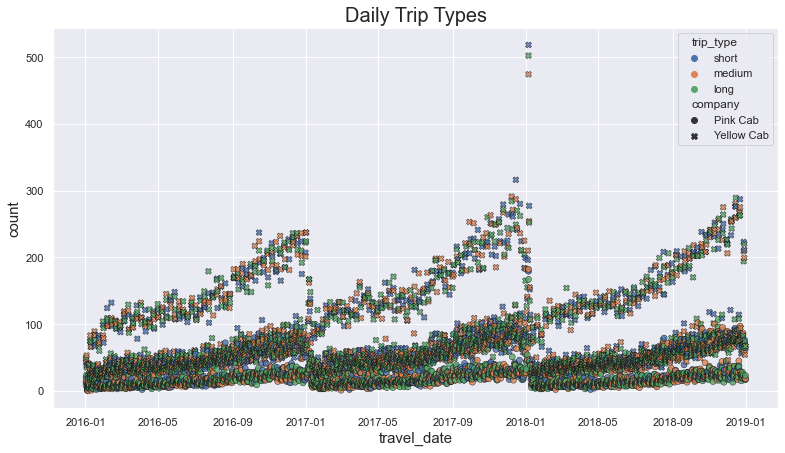

In [98]:
trip_date = full_df.groupby(['travel_date', 'company', 'trip_type']).size().reset_index().\
            rename(columns={0:'count'})

plt.figure(figsize = (13,7))
sns.scatterplot(x = 'travel_date', y = 'count', hue = 'trip_type', data = trip_date, alpha = 0.8, 
               edgecolor="black", style = 'company').set_title('Daily Trip Types');

At a daily level, there seems to be equal frequency of all trip types. No trip stands out in particular. Even on 5th Jan 2018, when the highest number of trips were made according to the data, all trip types were made on that day.

#### Is there any association between distance travelled and profit being at a loss?

I will use **chi-squared test** to test my hypothesis.

In [99]:
#Is there any association between distance travelled and profit_level being loss?

pd.crosstab(index = full_df.query("profit_level == 'loss'").profit_level, 
            columns = full_df.query("profit_level == 'loss'").trip_type)

trip_type     short  medium  long
profit_level                     
loss           8393    8186  8244

#### **Null Hypothesis (H0)**: There is no association between Loss and trip_type. <br>
#### **Alternative hypothesis (H1)**: There is an association between loss and trip_type. 

In [100]:
data = pd.crosstab(index = full_df.query("profit_level == 'loss'").profit_level, 
            columns = full_df.query("profit_level == 'loss'").trip_type).values

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


There is no association between profit being loss and distance travelled. 

#### Let's also test whether any association exists between other profit levels and distance travelled. The Null hypothesis remains the same as before (except its for profit instead of loss).

In [101]:
data = pd.crosstab(index = full_df.query("profit_level != 'loss'").profit_level, 
            columns = full_df.query("profit_level != 'loss'").trip_type).values

stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


For other profit levels, there is an association between distance profit and distance travelled.

# Customer Income

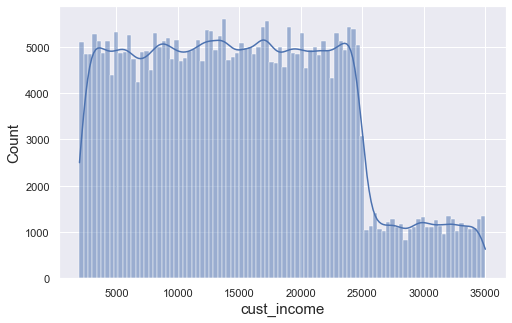

In [102]:
#Distribution of Customer Income
plt.figure(figsize = (8,5))
sns.histplot(x = 'cust_income', kde = True, data = full_df);

Just like age variable, the income of customers also follows a two-phase uniform distribution, signifying that there is an equal probability of finding customers belonging to all ranges of salary below 25000 $ and lower but yet equal probability of finding costomer's of higher income range.

##### Is there a relation between customer's income and the number of times the customer uses a Cab service?

In [103]:
#Creating a dataset that displays customer id, customer's income and total number of times the 
#customer has made the trip.

customer_income_trip_df = full_df.groupby(['customer_id', 'cust_income']).size().\
                                                reset_index().rename(columns = {0:'count'})

customer_income_trip_df

customer_id  cust_income  count
0                1        16359     29
1                2        12069     40
2                3        12968     46
3                4        13803     26
4                5         9965     31
...            ...          ...    ...
46143        59996        16634      4
46144        59997        22352     10
46145        59998         5678      9
46146        59999        24577      8
46147        60000        20303     18

[46148 rows x 3 columns]

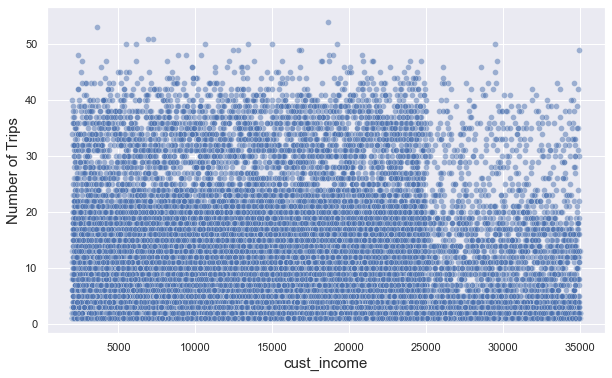

In [104]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'cust_income', y = 'count', data = customer_income_trip_df, 
               alpha = 0.5);
plt.ylabel("Number of Trips");

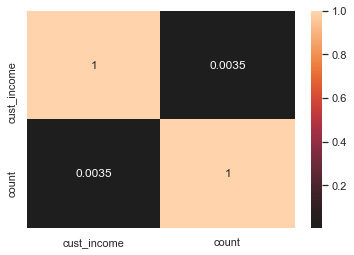

In [105]:
#Correlation using spearman as the data is not normally distributed and both variables are discrete, 
#not continuous.
sns.heatmap(customer_income_trip_df.iloc[:,1:].corr('spearman'), annot = True, center = 0);

According to the data in hand, there is absolutly no correlation between a customer's income and the number of times a customer travels using Cabs. Perhaps binning income levels help add more insights to our analysis. I have sourced income range categories from here: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system 

In [106]:
#Binning income levels

bins = [0, 2670.5, 4451.5, 8903.5, 20030.5, 35000.5]
label = ['low', 'low-middle', 'middle', 'upper-middle', 'high']

full_df['income_levels'] = pd.cut(full_df.cust_income, bins = bins, labels = label)

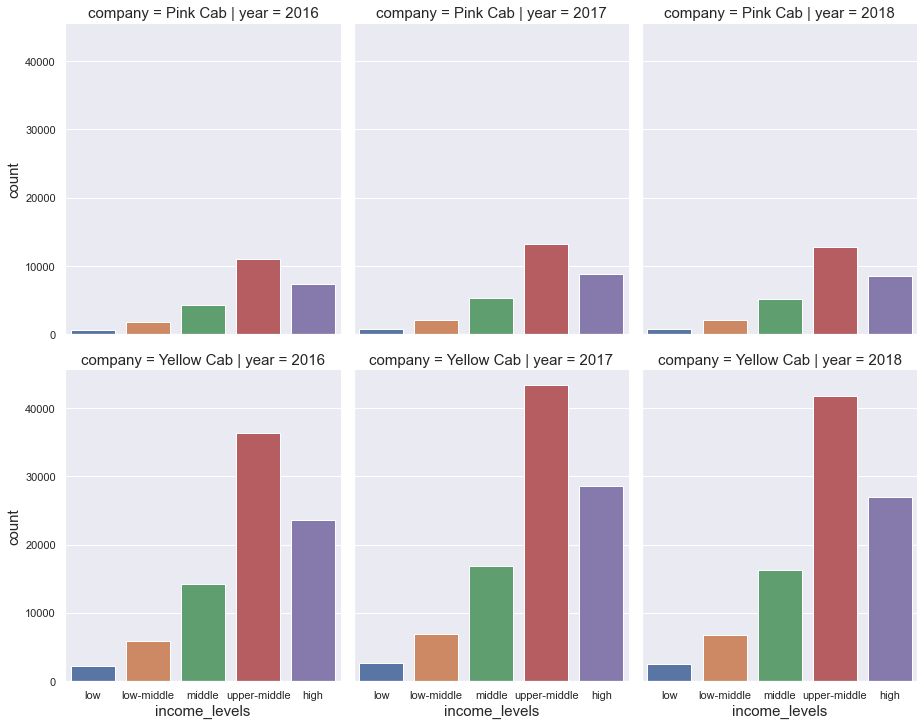

In [107]:
income_count = full_df.groupby(['year', 'company', 'income_levels']).size().reset_index().\
                                                                rename(columns = {0:'count'})

sns.catplot(x = 'income_levels', y = 'count', row = 'company', col = 'year', data = income_count, 
           kind = 'bar', aspect = 0.85);

After binning income, we can see that most of the passengers belong to upper-middle class for both Cab companies, followed by high income class. $\color{yellow}{\text{Yellow Cab}}$ have higher proportion of passengers. For both companies, there is a slight growth in passengers from 2016 to 2017, but then stagnated/dipped slightly below from 2017 tp 2018.

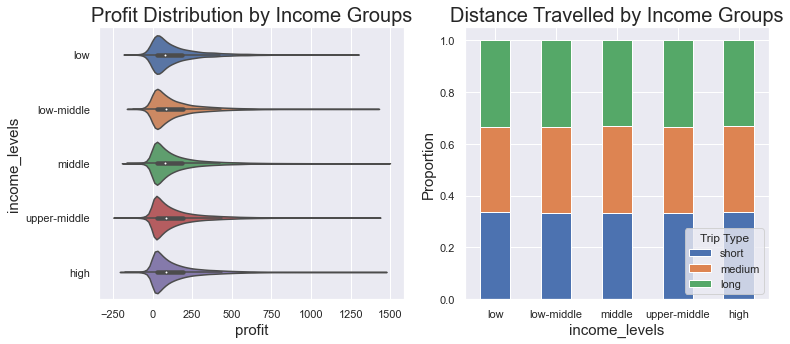

In [108]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))

sns.violinplot(x = 'profit', y = 'income_levels', data = full_df, ax = ax[0]).\
                            set_title("Profit Distribution by Income Groups");

pd.crosstab(index = full_df.income_levels, columns = full_df.trip_type, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, ax = ax[1], title = "Distance Travelled by Income Groups").\
legend(loc = "lower right", title = "Trip Type");

ax[1].set_ylabel('Proportion');

Across all income groups, the distribution of profit from all income classes are the same. Similarly, customers from all income classes have equal proportion of trip durations.

In [109]:
#Null Hypothesis (H0): No association between income and distance travelled
#Alternative (H1): Association exists between these 2 variables

data = pd.crosstab(index = full_df.income_levels, columns = full_df.trip_type).values

stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.4276562935845216
Independent (H0 holds true)


Both the plots and statistical tests proved that distance travelled does not depend on the income level of the customer.

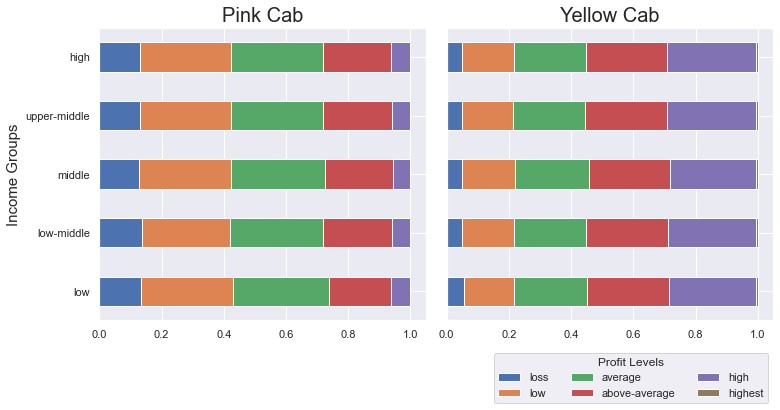

In [110]:
fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (11, 6), sharey = True)

#Pink Cab
pd.crosstab(columns = full_df.query("company == 'Pink Cab'").profit_level,
            index = full_df.query("company == 'Pink Cab'").income_levels, 
            normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Pink Cab", ylabel = "Proportion", 
                 xlabel = 'Income Groups', ax = ax[0], legend = False)

#Yellow Cab
pd.crosstab(columns = full_df.query("company == 'Yellow Cab'").profit_level, 
            index = full_df.query("company == 'Yellow Cab'").income_levels, 
            normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Yellow Cab", ylabel = "Proportion", 
                 xlabel = 'Income Groups', ax = ax[1]).\
legend(loc='lower right', bbox_to_anchor=(1.0, -0.3), ncol = 3, title = 'Profit Levels');

For both companies, the proportion of profit levels are the same for customer's of all income levels. There is no association between Customer's income and profit.

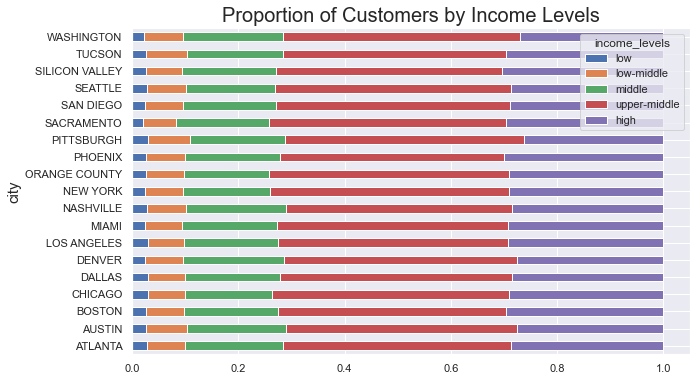

In [111]:
pd.crosstab(full_df.city, columns = full_df.income_levels, normalize = 'index').\
plot(kind = 'barh', stacked = True, figsize = (10,6), title = "Proportion of Customers by Income Levels");

All cities have similar customer distributions by income level.

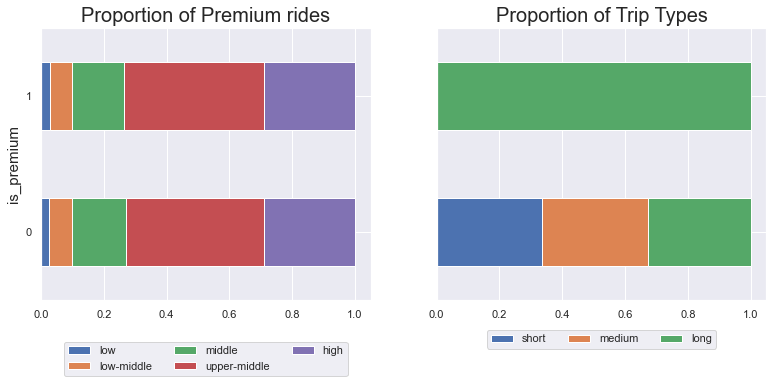

In [112]:
fig, ax = plt.subplots(1,2, sharey = True, figsize = (13,5))

pd.crosstab(index = full_df.is_premium, columns = full_df.income_levels, normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Proportion of Premium rides", ax = ax[0]).\
legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.3), ncol = 3);

pd.crosstab(index = full_df.is_premium, columns = full_df.trip_type, normalize = 'index').\
plot(kind = 'barh', stacked = True, title = "Proportion of Trip Types", ax = ax[1]).\
legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.2), ncol = 3);

For the `is_premum` variable, again my hypothesis for the premium cabs has been proven wrong as there is no association between is_premium variable with both distance and customer's income level. Therefore, I will drop this column.

From all of the above plots, we can conclude that customer's income level don't determine the Cab companies profit or mode of operation.

In [113]:
full_df.drop('is_premium', axis = 1, inplace = True)

##### Which Cab company has the most loyal customers?

In [114]:
loyal_cust = full_df.groupby(['customer_id', 'company']).size().reset_index().rename(columns = {0:'count'})

#identifying loyal customer's that has utilized a particular Cab company atleast 5 times.
loyal_cust['is_loyal_five'] = np.where(loyal_cust['count'] >= 5, 'Loyal', 'Not Loyal')

loyal_cust

customer_id     company  count is_loyal_five
0                1    Pink Cab      4     Not Loyal
1                1  Yellow Cab     25         Loyal
2                2    Pink Cab      4     Not Loyal
3                2  Yellow Cab     36         Loyal
4                3    Pink Cab      6         Loyal
...            ...         ...    ...           ...
72221        59998  Yellow Cab      6         Loyal
72222        59999    Pink Cab      2     Not Loyal
72223        59999  Yellow Cab      6         Loyal
72224        60000    Pink Cab      4     Not Loyal
72225        60000  Yellow Cab     14         Loyal

[72226 rows x 4 columns]

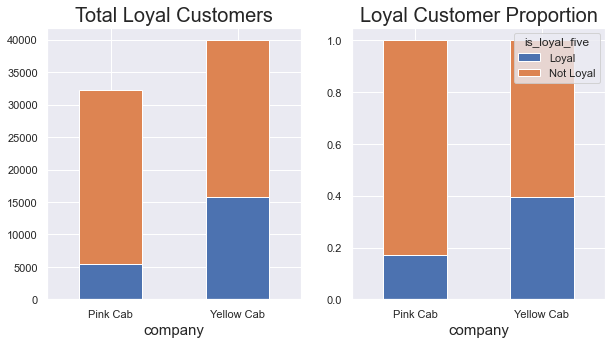

In [115]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_five).\
plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_five, normalize = 'index').\
plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

From the above plots, its clear that $\color{yellow}{\text{Yellow Cab}}$ customer's have more loyal customer's who has used the company's services atleast 5 times compared to  $\color{violet}{\text{Pink Cab}}$ company.

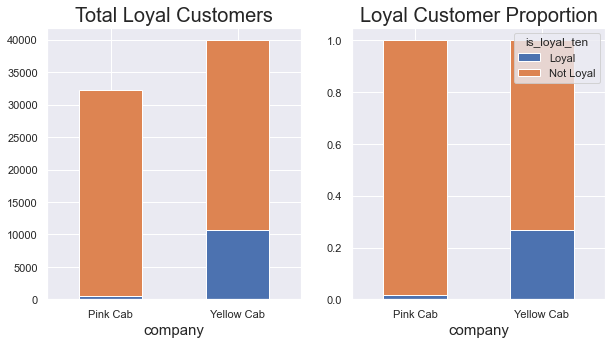

In [116]:
#identifying loyal customer's that has utilized a particular Cab company atleast 10 times.
loyal_cust['is_loyal_ten'] = np.where(loyal_cust['count'] >= 10, 'Loyal', 'Not Loyal')

fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_ten).\
plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);

pd.crosstab(index = loyal_cust.company, columns = loyal_cust.is_loyal_ten, normalize = 'index').\
plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

Same as before, $\color{yellow}{\text{Yellow Cab}}$ customer's have more loyal customer's who has used the company's services atleast 10 times compared to  $\color{violet}{\text{Pink Cab}}$ company.

#### Customer growth by year

In [117]:
#Annual Customer growth by company

yearly_cust_growth = full_df.groupby(['city', 'year', 'company']).agg({'customer_id':'nunique'}).\
                                                                                    reset_index()

yearly_cust_growth

city  year     company  customer_id
0       ATLANTA  2016    Pink Cab          477
1       ATLANTA  2016  Yellow Cab         1321
2       ATLANTA  2017    Pink Cab          577
3       ATLANTA  2017  Yellow Cab         1518
4       ATLANTA  2018    Pink Cab          545
..          ...   ...         ...          ...
109  WASHINGTON  2016  Yellow Cab         2944
110  WASHINGTON  2017    Pink Cab         1059
111  WASHINGTON  2017  Yellow Cab         2966
112  WASHINGTON  2018    Pink Cab         1044
113  WASHINGTON  2018  Yellow Cab         2959

[114 rows x 4 columns]

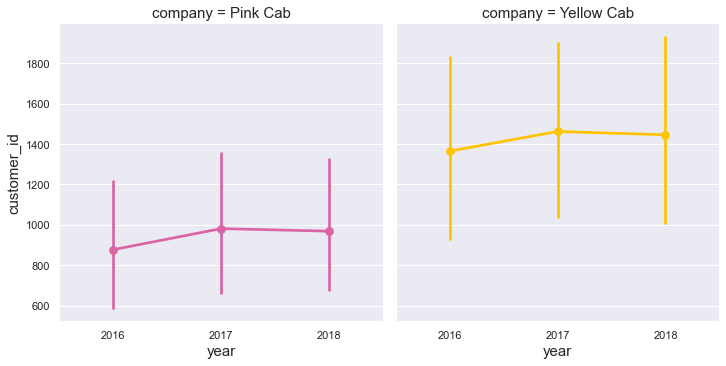

In [118]:
sns.catplot(y = 'customer_id', x = 'year', col = 'company', data = yearly_cust_growth, 
           kind = 'point', hue = 'company', palette = palette);

There was a slight growth of customer's from 2016 to 2017 but then lowered slightly from 2017 to 2018.

##### Preferred Payment Mode by Customers

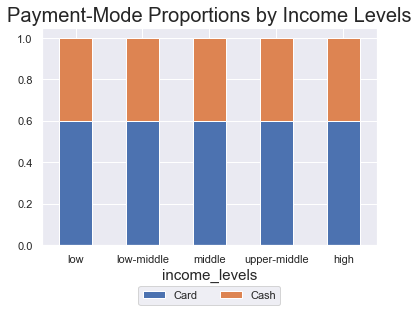

In [119]:
pd.crosstab(index = full_df.income_levels, columns = full_df.payment_mode, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Payment-Mode Proportions by Income Levels").\
legend(loc = "lower center", ncol = 2, bbox_to_anchor=(0.5, -0.3));

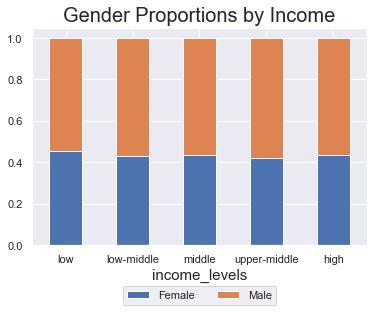

In [120]:
pd.crosstab(columns = full_df.gender, index = full_df.income_levels, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Gender Proportions by Income").\
legend(loc = 'lower center', ncol = 2, bbox_to_anchor = (0.5, -0.3));

### Age

The age distribution of the passengers in the dataset follows a two-phase uniform distribution. According to the data, the highest number of passengers are between the age groups of 18 to 40 year olds. Older passengers above 40 until 65 still make up a sizable portion of passengers.

In [121]:
full_df['age_level'] = pd.qcut(full_df.age, 5, 
                               labels = ['early_20s', 'late_20s', 'early_30s', 'middle_age', 'senior'])

# early_20s: 17.999 to 24.0 
# late_20s: 24.0 to 30.0 
# early_30s: 30.0 to 36.0 
# middle_age: 36.0 to 47.0
# senior : 47.0 to 65.0

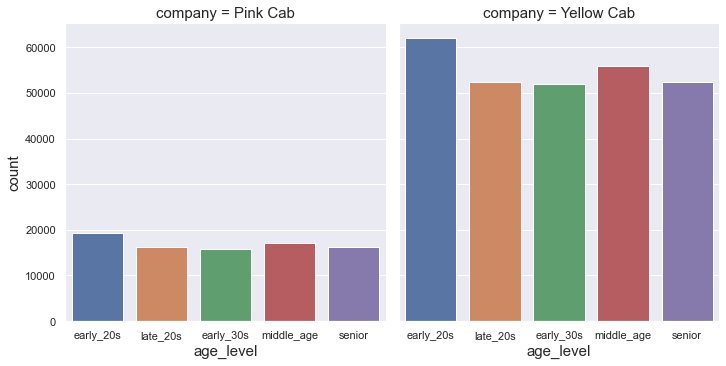

In [122]:
sns.catplot(x = 'age_level', col = 'company', data = full_df, kind = 'count');

$\color{yellow}{\text{Yellow Cab}}$ have higher number of customers, but the distribution of customers on an age level are the same for both companies.

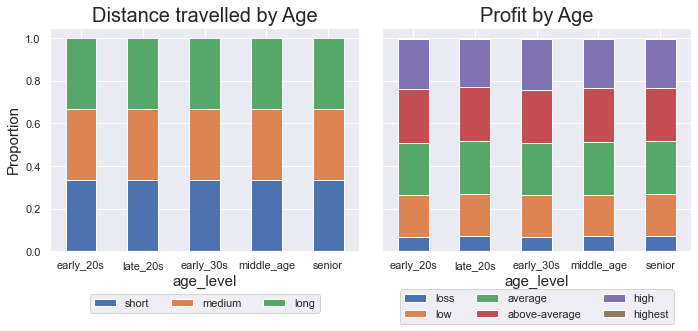

In [123]:
fig, ax = plt.subplots(1,2, figsize = (10,5), tight_layout = True, sharey = True)

pd.crosstab(index = full_df.age_level, columns = full_df.trip_type, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Distance travelled by Age", 
     ylabel = "Proportion", ax = ax[0]).\
legend(loc = "lower center", bbox_to_anchor = (0.5,-0.3), ncol = 3);

pd.crosstab(index = full_df.age_level, columns = full_df.profit_level, normalize = 'index').\
plot(kind = 'bar', stacked = True, rot = 0, title = "Profit by Age", ax = ax[1]).\
legend(loc = "lower center", bbox_to_anchor = (0.5,-0.35), ncol = 3);

Customer's age doesn't seem to have any affect on both Distance travelled and Profit as the proportions temains the same across all age levels.

# Conclusion

After analysing all the variables in the dataset, here is a summary of my analysis:
<br>
* Both Cab company's financial performance is mainly based on **profit**. Profit is derived from the difference of the **price charged** and **cost of trip** for each trip. Both of these variables are highly correlated with the **distance travelled** for each trip. And the total distance travelled in a day is positivelly correlated with **total number of daily trips**. 
<br>
<br>
* There is **weekly, monthly and quarterly seasonality** on the number of rides in a given time period. The number of cab rides are higher during December and at their lowest during February.  
<br>
<br>
*  $\color{yellow}{\text{Yellow Cab}}$ has higher coverage on cities and has higher loyal customers compared to $\color{violet}{\text{Pink Cab}}$. Moreover, $\color{yellow}{\text{Yellow Cab}}$ seems to perform well almost on all cities and is able to make significantly higher profits compared to it's rival.
<br>

#### In conclusion, we can measure a company's performace by looking at the total number of daily trips.

In the next section, I will include extra datasets with the full dataset to see other factors that can affect both company's mode of operations.

### Holidays vs Trips

In [124]:
holiday_df = pd.read_csv("US Holiday Dates (2004-2021).csv").\
             query('Date >= "2016-01-01" & Date <= "2018-12-31"').\
             sort_values('Date').reset_index(drop = True)

holiday_df.head()

Date                      Holiday WeekDay  Month  Day  Year
0  2016-01-01               New Year's Day  Friday      1    1  2016
1  2016-01-18  Martin Luther King, Jr. Day  Monday      1   18  2016
2  2016-02-14              Valentine’s Day  Sunday      2   14  2016
3  2016-02-15        Washington's Birthday  Monday      2   15  2016
4  2016-03-27               Western Easter  Sunday      3   27  2016

In [125]:
holiday_df.Date = pd.to_datetime(holiday_df.Date)
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     57 non-null     datetime64[ns]
 1   Holiday  57 non-null     object        
 2   WeekDay  57 non-null     object        
 3   Month    57 non-null     int64         
 4   Day      57 non-null     int64         
 5   Year     57 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.8+ KB


In [126]:
#Holidays are 1, non-holidays = 0

full_df['is_holiday'] = np.where(full_df['travel_date'].isin(holiday_df.Date), 1, 0)

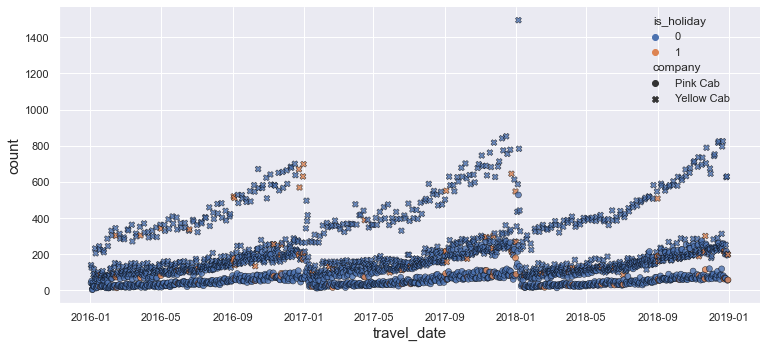

In [127]:
holiday_trip = full_df.groupby(['travel_date', 'company', 'is_holiday']).size().reset_index().\
               rename(columns = {0:'count'})

# plt.figure(figsize = (25,8));
g = sns.relplot(x = 'travel_date', y = 'count', hue = 'is_holiday', style = 'company', 
            data = holiday_trip, edgecolor="black", aspect = 1.9, height = 5, alpha = 0.8);

g._legend.set_bbox_to_anchor((0.95, 0.8))
plt.tight_layout();

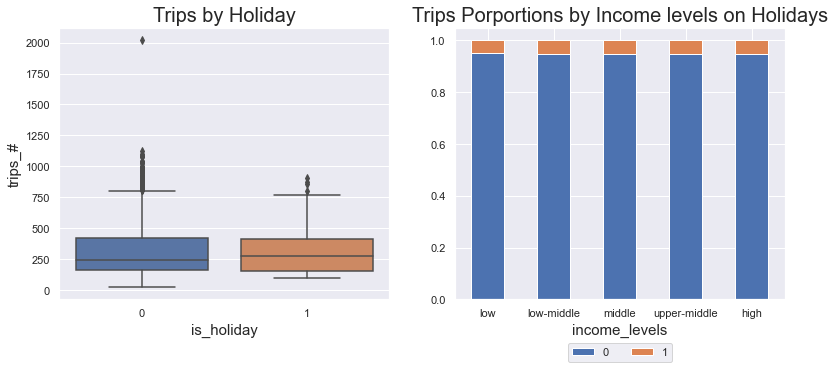

In [128]:
trip_holiday = full_df.groupby(['travel_date', 'is_holiday']).\
                   size().reset_index().rename(columns = {0:'trips_#'})

fig, ax = plt.subplots(1,2, figsize = (13,5))

sns.boxplot(x = 'is_holiday', y = 'trips_#', data = trip_holiday, ax = ax[0]).\
set_title('Trips by Holiday');

pd.crosstab(index = full_df.income_levels, columns = full_df.is_holiday, normalize = 'index').\
plot(kind='bar', stacked=True, title='Trips Porportions by Income levels on Holidays', ax=ax[1], rot = 0).\
legend(loc = 'lower center', bbox_to_anchor = (0.5,-0.25), ncol = 2);

The above plot shows that the number of trips done on both types of days are heavily skewed to the right. Also, customer's of all income levels have same proportions across levels for the number of trips they make on holidays and non-holidays.
<br>
<br>
The median number of trips for both categories seems almost equal. But we need to test this statistically inorder to establish an association between number of trips and type of holiday.
<br>
<br>
Similar to earlier, I will employ Kruskal-Wallis H-test to test for association between type of day and number of trips.

#### Is there an association between number of trips travelled on both holidays and non-holidays?

#### **Kruskal-Wallis H-test**
<br>

##### Null hypothesis (H0) : Median number of trips are the same for both types of Days.

##### Alternative Hypothesis (H1): Median number of trips are diffrent for both holidays.

In [129]:
from scipy import stats

a = holiday_trip.query('is_holiday == 0')['count'].values # not holiday trips
b = holiday_trip.query('is_holiday == 1')['count'].values # holiday trips

h, p = stats.kruskal(a, b)

print(f'H-Value: {h:.3f}')
print(f'P-value: {p:.3f}')
print()

alpha = 0.05

if p <= alpha:
    print('P-value less than alpha - Reject H0')
else:
    print('P-value higher than alpha - Cannot Reject H0')

H-Value: 0.161
P-value: 0.688

P-value higher than alpha - Cannot Reject H0


As the P-value is higher than the set alpha level, **we can conclude that holidays does not cause any increase or decrease in daily number of trips**.

### New York Weather Data Set

In order to find any association between weather conditions and trips, I sourced datasets related to climate in US through: https://www.ncei.noaa.gov/access/search/data-search/global-summary-of-the-day.
<br>
<br>
Unfortunatly, I was only able to source data for all three years (2016-2018) for New York. Therefore, this section analyses weather and trip information only for the state of New York.

In [130]:
ny_df = pd.read_csv('ny_weather.csv')
ny_df.DATE = pd.to_datetime(ny_df.DATE)
ny_df.rename(columns = {'DATE' : 'travel_date'}, inplace = True)
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   travel_date  1096 non-null   datetime64[ns]
 1   city         1096 non-null   object        
 2   state        1096 non-null   object        
 3   TEMP         1096 non-null   float64       
 4   DEWP         1096 non-null   float64       
 5   SLP          1096 non-null   float64       
 6   STP          1096 non-null   float64       
 7   VISIB        1096 non-null   float64       
 8   WDSP         1096 non-null   float64       
 9   MXSPD        1096 non-null   float64       
 10  GUST         1096 non-null   float64       
 11  PRCP         1096 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 102.9+ KB


In [131]:
full_df.columns

Index(['transaction_id', 'company', 'city', 'km_travelled', 'price_charged',
       'cost_of_trip', 'travel_date', 'customer_id', 'payment_mode', 'gender',
       'age', 'cust_income', 'state', 'year', 'month', 'date', 'day_of_week',
       'profit', 'trip_type', 'profit_level', 'income_levels', 'age_level',
       'is_holiday'],
      dtype='object')

In [132]:
df = ny_df.merge(full_df, how = 'inner', right_on = ['travel_date', 'city', 'state'], 
                 left_on = ['travel_date', 'city', 'state'])

df.columns

Index(['travel_date', 'city', 'state', 'TEMP', 'DEWP', 'SLP', 'STP', 'VISIB',
       'WDSP', 'MXSPD', 'GUST', 'PRCP', 'transaction_id', 'company',
       'km_travelled', 'price_charged', 'cost_of_trip', 'customer_id',
       'payment_mode', 'gender', 'age', 'cust_income', 'year', 'month', 'date',
       'day_of_week', 'profit', 'trip_type', 'profit_level', 'income_levels',
       'age_level', 'is_holiday'],
      dtype='object')

In [133]:
df.drop(['payment_mode', 'gender'], axis = 1, 
       inplace = True)

#renaming columns
df.rename(columns = {'TEMP' : 'avg_temp_F', #Daily avergae Temperature in Faherenheit
                      'DEWP' : 'dew_point', #Average Dew Point
                      'VISIB' : 'visibility', #Average Visbility
                      'MXSPD' : 'max_wind_speed', #Wind Speed
                      'PRCP' : 'precipitation' #Precipitation
                     }, inplace = True)

ny_weather_df = df[['travel_date', 'avg_temp_F', 'precipitation', 'city', 'price_charged', 
                    'cost_of_trip', 'km_travelled']]

In [134]:
ny_trip = ny_weather_df.groupby('travel_date').agg({'city' : 'count', 
                                                    'avg_temp_F' : 'median',
                                                    'precipitation' : 'median',
                                                    'km_travelled' : 'median',
                                                    'price_charged' : 'median',
                                                    'cost_of_trip' : 'median'}).\
          rename(columns = {'city' : 'trips_#'})

ny_trip.head()

trips_#  avg_temp_F  precipitation  km_travelled  price_charged  \
travel_date                                                                    
2016-01-02        35        35.8            0.0         26.40        769.190   
2016-01-03        32        38.4            0.0         24.97        667.725   
2016-01-04         5        30.8            0.0         19.62        546.690   
2016-01-05        14        18.4            0.0         27.12        750.450   
2016-01-06        18        31.2            0.0         19.86        454.400   

             cost_of_trip  
travel_date                
2016-01-02       333.7848  
2016-01-03       302.2432  
2016-01-04       280.1736  
2016-01-05       380.1600  
2016-01-06       244.1630

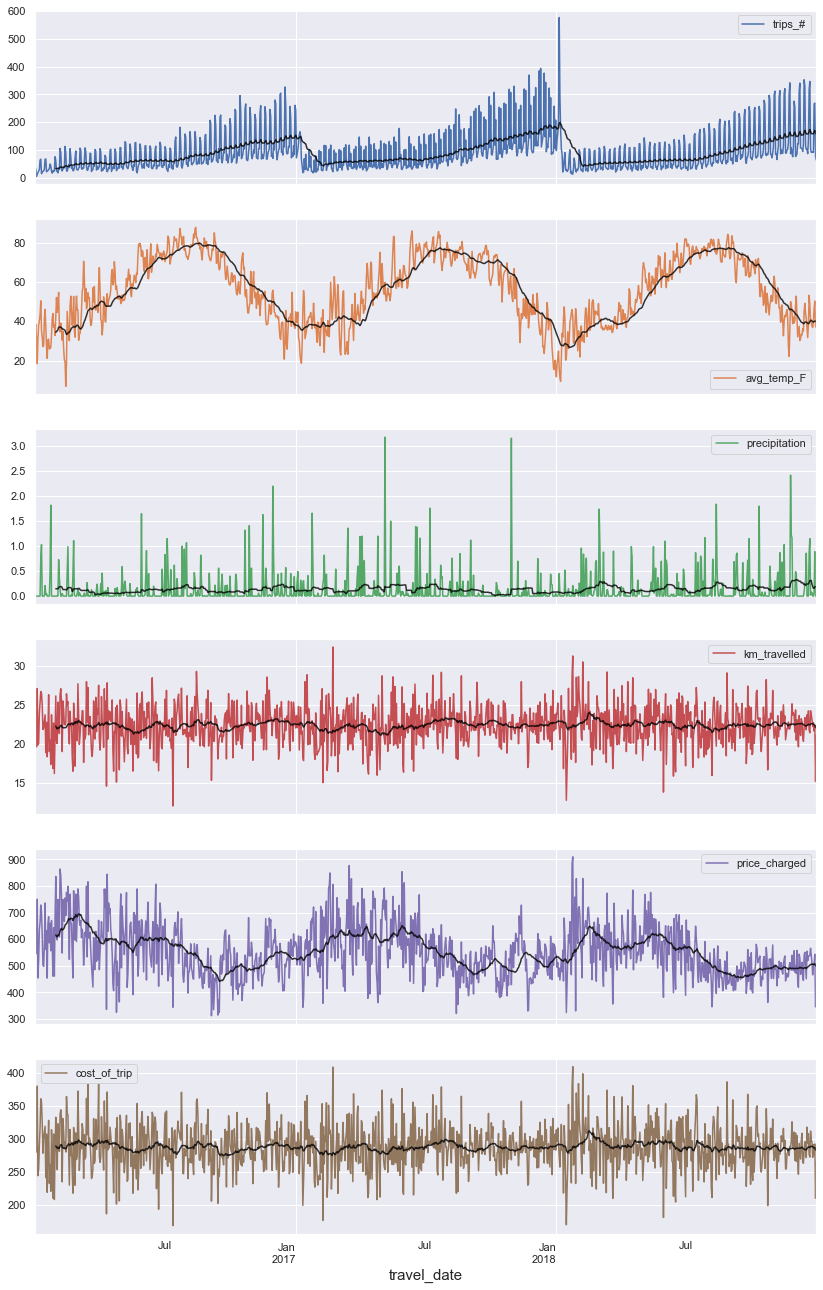

In [135]:
ax = ny_trip.plot(subplots = True, figsize = (14, 25));
ny_trip.rolling(30).mean().plot(subplots = True, ax = ax, color = 'black', alpha = 0.8, legend = False);

The above plots show daily variations in number of trips and changes in climate such as the median of  temperature, precipitation, price_charged, cost of trip and profit for New York. The black lines represents 30-day rolling mean of each of the variables.
<br>
<br>
Visually, there seems to be no apparent correlation between any of the variables. In the next section, I will do a **granger-causality test** to test for any correlation between any of these variables.

According to https://www.machinelearningplus.com/time-series/time-series-analysis-python/: 
<br>
"Granger causality test is used to determine if one time series will be useful to forecast another.
<br>
<br>
It is based on the idea that if X causes Y, then the forecast of Y based on previous values of Y AND the previous values of X should outperform the forecast of Y based on previous values of Y alone.
<br>
<br>
So, understand that Granger causality should not be used to test if a lag of Y causes Y. Instead, it is generally used on exogenous (not Y lag) variables only.
<br>
<br>
#### The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said lag of X is indeed useful."

I will test to see if the number of trips is affected by any of the climate variables.

In [136]:
from statsmodels.tsa.stattools import grangercausalitytests


targets = ['trips_#', 'price_charged', 'cost_of_trip']
cols = ['avg_temp_F', 'precipitation']

max_lags = 5 #number of lags

for i in targets:
    print()
    for j in cols:
        results = grangercausalitytests(ny_trip[[i, j]], max_lags, verbose = False); 
        p_values=[round(results[k+1][0]['ssr_ftest'][1],4) for k in range(max_lags)] 
        print(f'Target - {i}, Column - {j} : P_Values - {p_values}')


Target - trips_#, Column - avg_temp_F : P_Values - [0.5927, 0.2072, 0.3344, 0.427, 0.3226]
Target - trips_#, Column - precipitation : P_Values - [0.2944, 0.1333, 0.3011, 0.2327, 0.3633]

Target - price_charged, Column - avg_temp_F : P_Values - [0.0, 0.0015, 0.0262, 0.0643, 0.0109]
Target - price_charged, Column - precipitation : P_Values - [0.5259, 0.6726, 0.7212, 0.5892, 0.6939]

Target - cost_of_trip, Column - avg_temp_F : P_Values - [0.3175, 0.4408, 0.1474, 0.2272, 0.3029]
Target - cost_of_trip, Column - precipitation : P_Values - [0.1471, 0.2119, 0.3437, 0.2594, 0.3892]


The P-value for each of the lags is higher than 0.05 for daily trips vs climate variables. This signifies that both climate variables does not 'granger cause' number of trips. The same can be said for cost of trip. 
<br>
<br>
Interestingly, the P-value for the price charged variable and air temperature variables are below 5% threshold for the first 3 lags. But, we established earlier that the price of a trip is determined by the distance travelled, which when totalled daily is highly correlated with total daily trips. Therefore, I can conclude the daily mean temperature and precipitation does not affect both cab company's mode of operations.

# Extreme Weather Events

I managed to find data from 2016 to 2018 that records different extreme weather events in various states of US from https://www.ncdc.noaa.gov/stormevents/ftp.jsp.
<br>
<br>
I will compare the data obtained with the Cab dataset to see if extreme weather events affects both cab company's mode of operation.

In [137]:
ext_weather_df = pd.read_csv('extreme_weather.csv')
ext_weather_df.head()

EPISODE_ID  EVENT_ID       STATE state_abbr  EVENT_TYPE CZ_TYPE Event_Date  \
0      101345    607350     INDIANA         IN       Flood       C   1/1/2016   
1      101351    608907  WASHINGTON         WA   Avalanche       Z   1/1/2016   
2      101380    606587  WASHINGTON         WA  Heavy Snow       Z   1/3/2016   
3      101380    606588  WASHINGTON         WA  Heavy Snow       Z   1/3/2016   
4      101380    606590  WASHINGTON         WA  Heavy Snow       Z   1/3/2016   

   MAGNITUDE  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [138]:
ext_weather_df.isna().sum()

EPISODE_ID         0
EVENT_ID           0
STATE              0
state_abbr      8167
EVENT_TYPE         0
CZ_TYPE            0
Event_Date         0
MAGNITUDE     115747
dtype: int64

The dataset came with a document defining all the variables in the dataset. I am quoting some sentences from document regarding some variables:

`MAGNITUDE`:  "magnitude (Ex: 0.75, 60, 0.88, 2.75) - The magnitude of the event. This is only used for wind speeds and hail size (e.g. 0.75” of hail; 60 knot winds)".
<br>
<br>
Therefore there are lot of observations missing in `MAGNITUDE` column. I will drop those observations. The only way to quantify the severity of the event is by the `MAGNITUDE` variable. Hence, for this section, I will only be able to check the effect of both Hail and wind speeds with the Cab dataset.

In [139]:
ext_weather_df.dropna(axis = 0, inplace = True)

In [140]:
ext_weather_df.MAGNITUDE.fillna(0, inplace = True)
ext_weather_df.isna().sum()

EPISODE_ID    0
EVENT_ID      0
STATE         0
state_abbr    0
EVENT_TYPE    0
CZ_TYPE       0
Event_Date    0
MAGNITUDE     0
dtype: int64

In [141]:
np.setdiff1d(full_df.state.unique(), ext_weather_df.state_abbr.unique())

array(['DC'], dtype=object)

State 'DC' in missing in the extreme_weather dataset.

In [142]:
#COnverting Event_date to datatime format
ext_weather_df['Event_Date'] = pd.to_datetime(ext_weather_df['Event_Date'])

In [143]:
ext_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55508 entries, 56 to 175151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EPISODE_ID  55508 non-null  int64         
 1   EVENT_ID    55508 non-null  int64         
 2   STATE       55508 non-null  object        
 3   state_abbr  55508 non-null  object        
 4   EVENT_TYPE  55508 non-null  object        
 5   CZ_TYPE     55508 non-null  object        
 6   Event_Date  55508 non-null  datetime64[ns]
 7   MAGNITUDE   55508 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.8+ MB


In [144]:
ext_weather_df.head()

EPISODE_ID  EVENT_ID        STATE state_abbr         EVENT_TYPE CZ_TYPE  \
56      101521    607321  MISSISSIPPI         MS               Hail       C   
57      101524    607345      FLORIDA         FL  Thunderstorm Wind       C   
59      101524    607557      FLORIDA         FL  Thunderstorm Wind       C   
66      101550    607390     ARKANSAS         AR               Hail       C   
88      101607    607773        TEXAS         TX               Hail       C   

   Event_Date  MAGNITUDE  
56 2016-01-09       1.00  
57 2016-01-09      59.00  
59 2016-01-09      50.00  
66 2016-01-08       1.00  
88 2016-01-08       0.75

In [145]:
#Types of weather events
np.sort(ext_weather_df.EVENT_TYPE.unique())

array(['Hail', 'High Wind', 'Strong Wind', 'Thunderstorm Wind'],
      dtype=object)

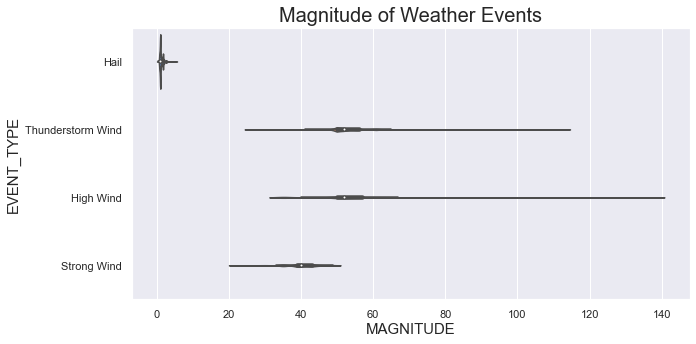

In [146]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'EVENT_TYPE', x = 'MAGNITUDE', data = ext_weather_df, orient = 'h').\
set_title("Magnitude of Weather Events");

Note: There is no unit for magnitude. As menitoned before, magnitude for hail represents the size of the hail. For Wind, magnitude repesents the wind speed. <br>
<br>
We can see from the above violinplots that the frequency of each of the weather events is very low at various magnitude.

In [147]:
ew_df = ext_weather_df.groupby(['Event_Date', 'state_abbr', 'EVENT_TYPE']).\
        median()[['MAGNITUDE']].reset_index()
ew_df.head()

Event_Date state_abbr         EVENT_TYPE  MAGNITUDE
0 2016-01-01         TX          High Wind       41.0
1 2016-01-02         AK          High Wind       62.5
2 2016-01-03         CA          High Wind       61.5
3 2016-01-06         AK          High Wind       82.0
4 2016-01-06         CA  Thunderstorm Wind       52.0

Next, I will join Cab dataset with extreme_weather dataset using 'Left join'. This way we will also have records where there was no extreme weather events in order to be able to compare those with extreme weatrher events.

In [148]:
new_df = full_df.query("state != 'DC'").merge(
    ew_df, 
    how = 'left', 
    left_on = ['travel_date', 'state'], 
    right_on = ['Event_Date', 'state_abbr']
).drop(['city', 'payment_mode', 'gender', 'is_holiday', 'day_of_week', 'cust_income'], axis = 1)

new_df.shape

(328116, 21)

In [149]:
new_df.head()

transaction_id   company  km_travelled  price_charged  cost_of_trip  \
0        10000013  Pink Cab          9.04         125.20        97.632   
1        10000029  Pink Cab         21.34         324.21       226.204   
2        10000030  Pink Cab         41.30         646.06       454.300   
3        10000041  Pink Cab         35.02         598.43       406.232   
4        10000045  Pink Cab          3.24          48.04        33.696   

  travel_date  customer_id  age state  year  ...  date   profit  trip_type  \
0  2016-01-02        28712   53    GA  2016  ...     2   27.568      short   
1  2016-01-02        58925   38    MA  2016  ...     2   98.006     medium   
2  2016-01-02        58551   25    MA  2016  ...     2  191.760       long   
3  2016-01-02         4289   19    IL  2016  ...     2  192.198       long   
4  2016-01-02         5734   23    IL  2016  ...     2   14.344      short   

    profit_level income_levels   age_level Event_Date state_abbr EVENT_TYPE  \
0            low  upper-middle      senior        NaT        NaN        NaN   
1  above-average          high  middle_age        NaT        NaN        NaN   
2  above-average          high    late_20s        NaT        NaN        NaN   
3  above-average          high   early_20s        NaT        NaN        NaN   
4            low          high   early_20s        NaT        NaN        NaN   

  MAGNITUDE  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

[5 rows x 21 columns]

In [150]:
new_df.isna().sum()

transaction_id         0
company                0
km_travelled           0
price_charged          0
cost_of_trip           0
travel_date            0
customer_id            0
age                    0
state                  0
year                   0
month                  0
date                   0
profit                 0
trip_type              0
profit_level           0
income_levels          0
age_level              0
Event_Date        277064
state_abbr        277064
EVENT_TYPE        277064
MAGNITUDE         277064
dtype: int64

In [151]:
new_df.EVENT_TYPE.unique()

array([nan, 'High Wind', 'Thunderstorm Wind', 'Hail', 'Strong Wind'],
      dtype=object)

Missing values in the `EVENT_TYPE` variable will be imputed with 'No Event' as this denotes that no extreme event took place on that day. And `MAGNITUDE` for 'No Event' category will be 0.

In [152]:
new_df.MAGNITUDE.fillna(0, inplace = True)
new_df.EVENT_TYPE.fillna('No Event', inplace = True)

In [153]:
new_df.isna().sum()

transaction_id         0
company                0
km_travelled           0
price_charged          0
cost_of_trip           0
travel_date            0
customer_id            0
age                    0
state                  0
year                   0
month                  0
date                   0
profit                 0
trip_type              0
profit_level           0
income_levels          0
age_level              0
Event_Date        277064
state_abbr        277064
EVENT_TYPE             0
MAGNITUDE              0
dtype: int64

In [154]:
new_df.duplicated().sum() #No duplicated values

0

In [155]:
new_df.drop(['Event_Date', 'state_abbr'], axis = 1, inplace = True)

In [156]:
new_df.isna().sum()

transaction_id    0
company           0
km_travelled      0
price_charged     0
cost_of_trip      0
travel_date       0
customer_id       0
age               0
state             0
year              0
month             0
date              0
profit            0
trip_type         0
profit_level      0
income_levels     0
age_level         0
EVENT_TYPE        0
MAGNITUDE         0
dtype: int64

In [157]:
new_df

transaction_id     company  km_travelled  price_charged  cost_of_trip  \
0             10000013    Pink Cab          9.04         125.20       97.6320   
1             10000029    Pink Cab         21.34         324.21      226.2040   
2             10000030    Pink Cab         41.30         646.06      454.3000   
3             10000041    Pink Cab         35.02         598.43      406.2320   
4             10000045    Pink Cab          3.24          48.04       33.6960   
...                ...         ...           ...            ...           ...   
328111        10439766  Yellow Cab         21.42         342.33      275.0328   
328112        10439782  Yellow Cab         27.00         369.86      327.2400   
328113        10439789  Yellow Cab         34.88         573.37      502.2720   
328114        10439843  Yellow Cab          6.42         116.99       90.1368   
328115        10439845  Yellow Cab         27.16         513.62      361.7712   

       travel_date  customer_id  age state  year  month  date    profit  \
0       2016-01-02        28712   53    GA  2016      1     2   27.5680   
1       2016-01-02        58925   38    MA  2016      1     2   98.0060   
2       2016-01-02        58551   25    MA  2016      1     2  191.7600   
3       2016-01-02         4289   19    IL  2016      1     2  192.1980   
4       2016-01-02         5734   23    IL  2016      1     2   14.3440   
...            ...          ...  ...   ...   ...    ...   ...       ...   
328111  2018-12-31        36141   21    WA  2018     12    31   67.2972   
328112  2018-12-31        36005   24    WA  2018     12    31   42.6200   
328113  2018-12-31        38291   64    WA  2018     12    31   71.0980   
328114  2018-12-31        40467   41    AZ  2018     12    31   26.8532   
328115  2018-12-31        40061   25    AZ  2018     12    31  151.8488   

       trip_type   profit_level income_levels   age_level EVENT_TYPE  \
0          short            low  upper-middle      senior   No Event   
1         medium  above-average          high  middle_age   No Event   
2           long  above-average          high    late_20s   No Event   
3           long  above-average          high   early_20s   No Event   
4          short            low          high   early_20s   No Event   
...          ...            ...           ...         ...        ...   
328111    medium        average  upper-middle   early_20s   No Event   
328112    medium        average  upper-middle   early_20s   No Event   
328113      long        average        middle      senior   No Event   
328114     short            low  upper-middle  middle_age   No Event   
328115    medium  above-average    low-middle    late_20s   No Event   

        MAGNITUDE  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
328111        0.0  
328112        0.0  
328113        0.0  
328114        0.0  
328115        0.0  

[328116 rows x 19 columns]

In [158]:
#Effect of EVENT TYPES on trips

event_trip = new_df.groupby(['travel_date', 'EVENT_TYPE']).\
            agg({'state' : 'count', 'MAGNITUDE' : 'median'}).reset_index().\
            rename(columns = {'state' : 'trips'})

event_trip

travel_date   EVENT_TYPE  trips  MAGNITUDE
0     2016-01-02     No Event    156        0.0
1     2016-01-03    High Wind     56       61.5
2     2016-01-03     No Event    101        0.0
3     2016-01-04     No Event     24        0.0
4     2016-01-05     No Event     38        0.0
...          ...          ...    ...        ...
2262  2018-12-30    High Wind     71       54.0
2263  2018-12-30     No Event    152        0.0
2264  2018-12-31    High Wind     73       54.5
2265  2018-12-31     No Event    153        0.0
2266  2018-12-31  Strong Wind     58       37.0

[2267 rows x 4 columns]

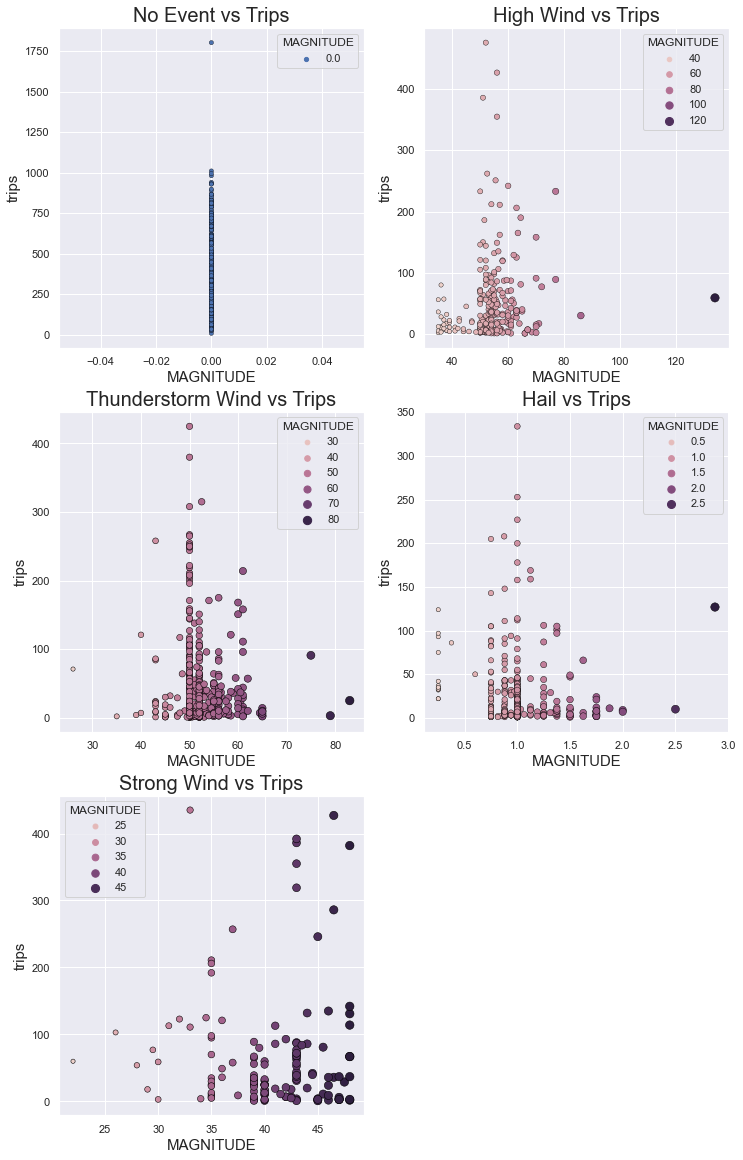

In [159]:
fig, axes = plt.subplots(3,2, figsize = (12,20))

for event, ax in zip(event_trip.EVENT_TYPE.unique(), axes.flatten()):
    sns.scatterplot(x = 'MAGNITUDE', y = 'trips', data = event_trip.query(f'EVENT_TYPE == "{event}"'), 
                   ax = ax, size = 'MAGNITUDE', hue = 'MAGNITUDE', edgecolor = 'black').\
    set_title(f"{event} vs Trips");

fig.delaxes(axes[2,1]);

Thr above plots illustrates the effect of Magnitude of different events on number of daily trips. 
<br>
<br>
The first plot is obvious - days with no extreme weather events dont affect number of trips. Whereas on all other plots, magnitude of events below certain thresholds don't seems to affect number of trips daily.
<br>
<br>
But, after certain threshold, the plots show lower number of trips at very high magnitude. 
<br>
<br>
An exception to this is for the Strong Winds event. There are higher number of trips when the magnitude of Strong Winds are high.

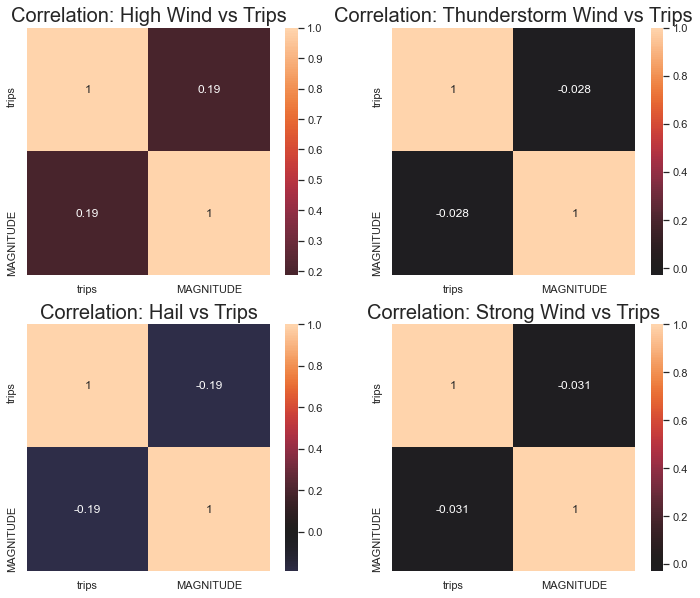

In [160]:
fig, axes = plt.subplots(2,2, figsize = (12,10))

for event, ax in zip(['High Wind', 'Thunderstorm Wind', 'Hail', 'Strong Wind'], axes.flatten()):
    sns.heatmap(event_trip.query(f'EVENT_TYPE == "{event}"')[['trips', 'MAGNITUDE']].corr('spearman'), 
               ax = ax, center = 0, annot = True).\
    set_title(f"Correlation: {event} vs Trips");

Using spearman correlation, there is no correlation between each events and number of trips. Therefore, according to the data, the number of trips does not increase or decrease during a weather event.

In [161]:
#Creating new variable where any event other than 'No Event' is 1.
new_df['is_extreme'] = np.where(new_df['EVENT_TYPE'] == 'No Event', 0, 1)

In [162]:
is_extreme_trip = new_df.groupby(['travel_date', 'is_extreme']).size().reset_index().\
             rename(columns = {0:'count'})

is_extreme_trip

travel_date  is_extreme  count
0     2016-01-02           0    156
1     2016-01-03           0    101
2     2016-01-03           1     56
3     2016-01-04           0     24
4     2016-01-05           0     38
...          ...         ...    ...
1704  2018-12-29           1     17
1705  2018-12-30           0    152
1706  2018-12-30           1     71
1707  2018-12-31           0    153
1708  2018-12-31           1    131

[1709 rows x 3 columns]

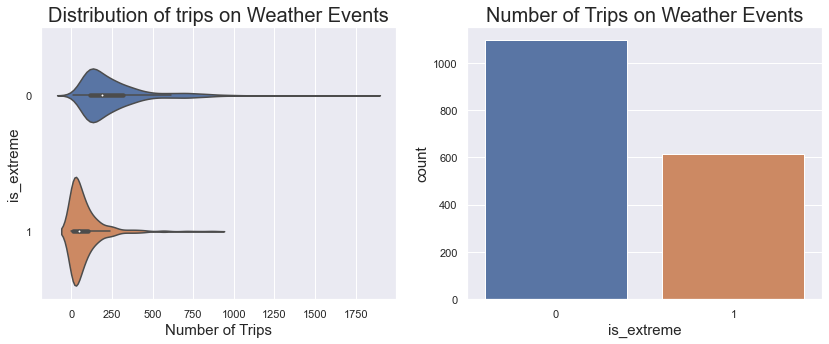

In [163]:
fig, ax = plt.subplots(1,2, figsize = (14,5))
sns.violinplot(y = 'is_extreme', x = 'count', data = is_extreme_trip, orient = 'h', ax = ax[0]).\
set_title("Distribution of trips on Weather Events");

ax[0].set_xlabel('Number of Trips');

sns.countplot(x = 'is_extreme', data = is_extreme_trip, ax = ax[1]).\
set_title("Number of Trips on Weather Events");

The above plots shows that median number of trips on both types of weather conditions differs a lot. On days with weather evets, the median trips are much lower than days with no weather events.
<br>
<br>
I will perform a statistical test again like earlier, testing whether the median number of trips during both events are the same or not.

In [164]:
from scipy import stats

a = is_extreme_trip.query('is_extreme == 0')['count'].values # not holiday trips
b = is_extreme_trip.query('is_extreme == 1')['count'].values # holiday trips

h, p = stats.kruskal(a, b)

print(f'H-Value: {h:.3f}')
print(f'P-value: {p:.3f}')
print()

alpha = 0.05

if p <= alpha:
    print('P-value less than alpha - Reject H0')
else:
    print('P-value higher than alpha - Cannot Reject H0')

H-Value: 615.693
P-value: 0.000

P-value less than alpha - Reject H0


The above tests shows that there is a difference in number of trips during non-weather and weather events. 

In [165]:
# new_df.to_csv('df_with_weather_events.csv')